In [78]:
# ez most tökéletesen működik 2024.05.11. 10:38
# új módon, importált TZ függvényekkel

###Tedd elérhetővé a "df_EFC_CZ_post_analyzing_merged.csv és "TZ_functions.py" fájlokat
Ha Google Colabban futtatod, töltsd fel és csomagoltasd ki a "Flyball_input.zip" fájlt. Ha nem abban, lépd át ezeket a cellákat.

In [79]:
######### 240502 ######## Google Colab-ba fájlok feltöltése
from google.colab import files
import os

# Minden korábbi fájl és mappa törlése a Colab környezetben
files_and_folders = os.listdir()
for item in files_and_folders:
    if os.path.isfile(item):
        os.remove(item)

# Fájlok feltöltése
uploaded_files = files.upload()

# A feltöltött fájlok neveinek kinyerése
file_name = list(uploaded_files.keys())[0]

Saving Flyball_input.zip to Flyball_input.zip


In [80]:
### 240502 ### Google Colab-ban ZIP file kicsomagolása
from zipfile import ZipFile

with ZipFile(file_name, 'r') as zipfile2:
    zipfile2.extractall()
    print('Kicsomagolt fájlok:')
    for name in zipfile2.namelist():
        print(name)
    print('Done')

Kicsomagolt fájlok:
df_EFC_output.csv
df_CZ_output.csv
Wild_Runners_Flyball_Team_kutyak_alapadatai.xlsx
FLYBALLCZ_versenyadatok.xlsx
EFC_versenyadatok.xlsx
TZ_functions.py
df_EFC_CZ_track_good-date.csv
df_WRFT_output.csv
df_events.csv
df_EFC_CZ_post_analyzing_merged.csv
df_EFC_CZ_Weather.csv
Done


# alap importok és mindenféle megjelenítési beállítások, kikommentelve igény szerint:

In [81]:
from IPython.display import display, HTML
import pandas as pd

# Beállítások
pd.set_option('display.max_rows', False)           # Az összes sor megjelenítése
pd.set_option('display.max_colwidth', None)        # Teljes méretű szöveges oszlopok
pd.set_option('display.expand_frame_repr', False)  # DataFrame vízszintes kiterjesztése kikapcsolva
pd.set_option('display.max_columns', 0)            # Az összes oszlop megjelenítése

In [82]:
import seaborn as sns
import numpy as np
import pandas as pd
import os
import shutil
sns.set(style="ticks")
seed=42
np.random.seed(seed)
#maximális oszlopszám megjelenítése
pd.options.display.max_columns = 20

In [83]:
display(HTML("<style>.container { width:100% !important; }</style>"))

In [84]:
pd.options.display.max_colwidth =300

# SAJÁT FÜGGVÉNYEK:

In [85]:
# betöltöm a 'TZ_functions.py' fájlban található saját gyártású, rendszeresen használt függvényeket
get_ipython().run_line_magic('run', 'TZ_functions.py')

 ############### ADATDOKI függvényei   ############### 
 ############### TZ_functions.py       ############### 
 ############### version = 2024.05.11. ############### 
A li() függvény listázásnál, legyen alapértelmezett a sorok száma?
 0 = ne legyen, azaz listázáskor rákérdez. Vagy szám = ennyi sort listáz rákérdezés nélkül. ("enter" változó)6


<Figure size 640x480 with 0 Axes>

##itt indul az API-zás

In [86]:
import requests
import json

In [87]:
API_key = '#ide írd be a saját API kulcsodat' #ide írd be a saját API kulcsodat

#### Félautomata lekérdezés mód

In [141]:
key = API_key
q = 'Nove Mesto pod Smrkem'
dt = '2023-07-02'

In [142]:
url = 'http://api.weatherapi.com/v1/history.json'

In [143]:
real_url = f"{url}&?key={key}&q={q}&dt={dt}"

In [144]:
response = requests.get(real_url)

In [145]:
# egy próba helyszín lekérése
print(response.json())

{'location': {'name': 'Nove Mesto Pod Smrkem', 'region': 'Ustecky kraj', 'country': 'Czech Republic', 'lat': 50.92, 'lon': 15.23, 'tz_id': 'Europe/Prague', 'localtime_epoch': 1718022464, 'localtime': '2024-06-10 14:27'}, 'forecast': {'forecastday': [{'date': '2023-07-02', 'date_epoch': 1688256000, 'day': {'maxtemp_c': 19.9, 'maxtemp_f': 67.8, 'mintemp_c': 13.8, 'mintemp_f': 56.8, 'avgtemp_c': 16.7, 'avgtemp_f': 62.0, 'maxwind_mph': 10.5, 'maxwind_kph': 16.9, 'totalprecip_mm': 3.6, 'totalprecip_in': 0.14, 'totalsnow_cm': 0.0, 'avgvis_km': 7.5, 'avgvis_miles': 4.0, 'avghumidity': 79, 'daily_will_it_rain': 1, 'daily_chance_of_rain': 100, 'daily_will_it_snow': 0, 'daily_chance_of_snow': 0, 'condition': {'text': 'Heavy rain at times', 'icon': '//cdn.weatherapi.com/weather/64x64/day/305.png', 'code': 1192}, 'uv': 4.0}, 'astro': {'sunrise': '04:50 AM', 'sunset': '09:16 PM', 'moonrise': '09:05 PM', 'moonset': '03:00 AM', 'moon_phase': 'Waxing Gibbous', 'moon_illumination': 97}, 'hour': [{'time

In [146]:
# működött, így hát függvény készült belőle
import requests

def get_weather_history(key, q, dt):
    url = 'http://api.weatherapi.com/v1/history.json'
    params = {
        'key': key,
        'q': q,
        'dt': dt
    }
    response = requests.get(url, params=params)
    return response.json()

# Példa használat:
key = API_key
q = 'Nove Mesto pod Smrkem'
dt = '2023-07-02'
weather_data = get_weather_history(key, q, dt)
print(weather_data)


{'location': {'name': 'Nove Mesto Pod Smrkem', 'region': 'Ustecky kraj', 'country': 'Czech Republic', 'lat': 50.92, 'lon': 15.23, 'tz_id': 'Europe/Prague', 'localtime_epoch': 1718022386, 'localtime': '2024-06-10 14:26'}, 'forecast': {'forecastday': [{'date': '2023-07-02', 'date_epoch': 1688256000, 'day': {'maxtemp_c': 19.9, 'maxtemp_f': 67.8, 'mintemp_c': 13.8, 'mintemp_f': 56.8, 'avgtemp_c': 16.7, 'avgtemp_f': 62.0, 'maxwind_mph': 10.5, 'maxwind_kph': 16.9, 'totalprecip_mm': 3.6, 'totalprecip_in': 0.14, 'totalsnow_cm': 0.0, 'avgvis_km': 7.5, 'avgvis_miles': 4.0, 'avghumidity': 79, 'daily_will_it_rain': 1, 'daily_chance_of_rain': 100, 'daily_will_it_snow': 0, 'daily_chance_of_snow': 0, 'condition': {'text': 'Heavy rain at times', 'icon': '//cdn.weatherapi.com/weather/64x64/day/305.png', 'code': 1192}, 'uv': 4.0}, 'astro': {'sunrise': '04:50 AM', 'sunset': '09:16 PM', 'moonrise': '09:05 PM', 'moonset': '03:00 AM', 'moon_phase': 'Waxing Gibbous', 'moon_illumination': 97}, 'hour': [{'time

In [147]:
# szűkítem a lekért adatokat
import requests

def get_weather_history(key, q, dt):
    url = 'http://api.weatherapi.com/v1/history.json'
    params = {
        'key': key,
        'q': q,
        'dt': dt
    }
    response = requests.get(url, params=params)
    data = response.json()
    if 'error' in data:
        return data['error']
    else:
        print(q)
        return {
            'temperature': data['forecast']['forecastday'][0]['day']['avgtemp_c'],
            'wind_speed': data['forecast']['forecastday'][0]['day']['maxwind_kph'],
            'humidity': data['forecast']['forecastday'][0]['day']['avghumidity'],
            'precipitation': data['forecast']['forecastday'][0]['day']['totalprecip_mm']
        }

# Példa használat:
key = API_key
q = 'Vodnany'
dt = '2023-07-02'
weather_data = get_weather_history(key, q, dt)
print(weather_data)


Vodnany
{'temperature': 18.4, 'wind_speed': 25.9, 'humidity': 67, 'precipitation': 0.0}


El kellett készíteni a dátumokhoz kapcsolódó helyszínek listáját. Rettenet mennyiségű próbálkozás volt automatikus Python kódot írni, ami hiba nélkül készít egy ezt tartalmazó dataframe-t. Nem sikerült. Az adatokban szereplő dupla napok valahogy mindig bezavartak a dátumkezelésbe. Maradt hát a kézi lista.

In [148]:
events_data = """Crazy Cup (Nové Město pod Smrkem) 2023. július 1-2.
Flyvaryors turnaj (Blšany) 2023. május 20-21.
Budějckej xtreme 2. ring (Vodňany) 2023. október 14-15.
Budějckej xtreme 1. ring (Vodňany) 2023. október 14-15.
Eager´s Cup 2. ring (Žamberk) 2023. május 6-7.
Eager´s Cup 1. ring (Žamberk) 2023. május 6-7.
Máchale, spadlo ti to! (Louňovice) 2023. július 15-16.
Křupky na břehu (Litomyšl) 2023. szeptember 16-17.
MED's Trophy (Pláně) 2023. június 10-11.
Mistrovství České republiky (Blšany) 2023. szeptember 3-4.
BCCCZ mistrovství (Prostějov) 2023. június 24-25.
EFC - Ring 1 (Tápiószentmárton) 2023. július 30.
EFC - Ring 2 (Tápiószentmárton) 2023. július 30.
EFC - Ring 1 (Tápiószentmárton) 2023. július 29.
Hanácké škvarek (Heroltice) 2023. április 22-23.
EFC - Ring 2 (Tápiószentmárton) 2023. július 29."""

In [150]:
"""
#20240419 majdnem jó eseménylista
import pandas as pd

data = [
    ("Crazy Cup (Nové Město pod Smrkem) 2023. július 1.", "Nové Město pod Smrkem", "2023. július 1.", "2023-07-01"),
    ("Crazy Cup (Nové Město pod Smrkem) 2023. július 2.", "Nové Město pod Smrkem", "2023. július 2.", "2023-07-02"),
    ("Flyvaryors turnaj (Blšany) 2023. május 20.", "Blšany", "2023. május 20.", "2023-05-20"),
    ("Flyvaryors turnaj (Blšany) 2023. május 21.", "Blšany", "2023. május 21.", "2023-05-21"),
    ("Budějckej xtreme 2. ring (Vodňany) 2023. október 14.", "Vodňany", "2023. október 14.", "2023-10-14"),
    ("Budějckej xtreme 2. ring (Vodňany) 2023. október 15.", "Vodňany", "2023. október 15.", "2023-10-15"),
    ("Budějckej xtreme 1. ring (Vodňany) 2023. október 14.", "Vodňany", "2023. október 14.", "2023-10-14"),
    ("Budějckej xtreme 1. ring (Vodňany) 2023. október 15.", "Vodňany", "2023. október 15.", "2023-10-15"),
    ("Eager´s Cup 2. ring (Žamberk) 2023. május 6.", "Žamberk", "2023. május 6.", "2023-05-06"),
    ("Eager´s Cup 2. ring (Žamberk) 2023. május 7.", "Žamberk", "2023. május 7.", "2023-05-07"),
    ("Eager´s Cup 1. ring (Žamberk) 2023. május 6.", "Žamberk", "2023. május 6.", "2023-05-06"),
    ("Eager´s Cup 1. ring (Žamberk) 2023. május 7.", "Žamberk", "2023. május 7.", "2023-05-07"),
    ("Máchale, spadlo ti to! (Louňovice) 2023. július 15.", "Louňovice", "2023. július 15.", "2023-07-15"),
    ("Máchale, spadlo ti to! (Louňovice) 2023. július 16.", "Louňovice", "2023. július 16.", "2023-07-16"),
    ("Křupky na břehu (Litomyšl) 2023. szeptember 16.", "Litomyšl", "2023. szeptember 16.", "2023-09-16"),
    ("Křupky na břehu (Litomyšl) 2023. szeptember 17.", "Litomyšl", "2023. szeptember 17.", "2023-09-17"),
    ("MED's Trophy (Pláně) 2023. június 10.", "Pláně", "2023. június 10.", "2023-06-10"),
    ("MED's Trophy (Pláně) 2023. június 11.", "Pláně", "2023. június 11.", "2023-06-11"),
    ("Mistrovství České republiky (Blšany) 2023. szeptember 3.", "Blšany", "2023. szeptember 3.", "2023-09-03"),
    ("Mistrovství České republiky (Blšany) 2023. szeptember 4.", "Blšany", "2023. szeptember 4.", "2023-09-04"),
    ("BCCCZ mistrovství (Prostějov) 2023. június 24.", "Prostějov", "2023. június 24.", "2023-06-24"),
    ("BCCCZ mistrovství (Prostějov) 2023. június 25.", "Prostějov", "2023. június 25.", "2023-06-25"),
    ("EFC - Ring 1 (Tápiószentmárton) 2023. július 30.", "Tápiószentmárton", "2023. július 30.", "2023-07-30"),
    ("EFC - Ring 2 (Tápiószentmárton) 2023. július 30.", "Tápiószentmárton", "2023. július 30.", "2023-07-30"),
    ("EFC - Ring 1 (Tápiószentmárton) 2023. július 29.", "Tápiószentmárton", "2023. július 29.", "2023-07-29"),
    ("Hanácké škvarek (Heroltice) 2023. április 22.", "Heroltice", "2023. április 22.", "2023-04-22"),
    ("Hanácké škvarek (Heroltice) 2023. április 23.", "Heroltice", "2023. április 23.", "2023-04-23"),
    ("EFC - Ring 2 (Tápiószentmárton) 2023. július 29.", "Tápiószentmárton", "2023. július 29.", "2023-07-29")
]

# DataFrame létrehozása
df_events_weather = pd.DataFrame(data, columns=['event_all', 'location', 'formatted_date', 'event_date'])
di(df_events_weather)
"""

,event_all,location,formatted_date,event_date
0,Crazy Cup (Nové Město pod Smrkem) 2023. július 1.,Nové Město pod Smrkem,2023. július 1.,2023-07-01
1,Crazy Cup (Nové Město pod Smrkem) 2023. július 2.,Nové Město pod Smrkem,2023. július 2.,2023-07-02
2,Flyvaryors turnaj (Blšany) 2023. május 20.,Blšany,2023. május 20.,2023-05-20
3,Flyvaryors turnaj (Blšany) 2023. május 21.,Blšany,2023. május 21.,2023-05-21
4,Budějckej xtreme 2. ring (Vodňany) 2023. október 14.,Vodňany,2023. október 14.,2023-10-14
5,Budějckej xtreme 2. ring (Vodňany) 2023. október 15.,Vodňany,2023. október 15.,2023-10-15
6,Budějckej xtreme 1. ring (Vodňany) 2023. október 14.,Vodňany,2023. október 14.,2023-10-14
7,Budějckej xtreme 1. ring (Vodňany) 2023. október 15.,Vodňany,2023. október 15.,2023-10-15
8,Eager´s Cup 2. ring (Žamberk) 2023. május 6.,Žamberk,2023. május 6.,2023-05-06
9,Eager´s Cup 2. ring (Žamberk) 2023. május 7.,Žamberk,2023. május 7.,2023-05-07


In [151]:
#20240419 ez a jó eseménylista
import pandas as pd

data1 = [
    ("Crazy Cup (Nové Město pod Smrkem) 2023. július 1.", "Nové Město pod Smrkem", "2023. július 1.", "2023-07-01"),
    ("Crazy Cup (Nové Město pod Smrkem) 2023. július 2.", "Nové Město pod Smrkem", "2023. július 2.", "2023-07-02"),
    ("Flyvaryors turnaj (Blšany) 2023. május 20.", "Blšany", "2023. május 20.", "2023-05-20"),
    ("Flyvaryors turnaj (Blšany) 2023. május 21.", "Blšany", "2023. május 21.", "2023-05-21"),
    ("Budějckej xtreme 2. ring (Vodňany) 2023. október 14.", "Vodňany", "2023. október 14.", "2023-10-14"),
    ("Budějckej xtreme 2. ring (Vodňany) 2023. október 15.", "Vodňany", "2023. október 15.", "2023-10-15"),
    ("Budějckej xtreme 1. ring (Vodňany) 2023. október 14.", "Vodňany", "2023. október 14.", "2023-10-14"),
    ("Budějckej xtreme 1. ring (Vodňany) 2023. október 15.", "Vodňany", "2023. október 15.", "2023-10-15"),
    ("Eager´s Cup 2. ring (Žamberk) 2023. május 6.", "Žamberk", "2023. május 6.", "2023-05-06"),
    ("Eager´s Cup 2. ring (Žamberk) 2023. május 7.", "Žamberk", "2023. május 7.", "2023-05-07"),
    ("Eager´s Cup 1. ring (Žamberk) 2023. május 6.", "Žamberk", "2023. május 6.", "2023-05-06"),
    ("Eager´s Cup 1. ring (Žamberk) 2023. május 7.", "Žamberk", "2023. május 7.", "2023-05-07"),
    ("Máchale, spadlo ti to! (Louňovice) 2023. július 15.", "Louňovice", "2023. július 15.", "2023-07-15"),
    ("Máchale, spadlo ti to! (Louňovice) 2023. július 16.", "Louňovice", "2023. július 16.", "2023-07-16"),
    ("Křupky na břehu (Litomyšl) 2023. szeptember 16.", "Litomyšl", "2023. szeptember 16.", "2023-09-16"),
    ("Křupky na břehu (Litomyšl) 2023. szeptember 17.", "Litomyšl", "2023. szeptember 17.", "2023-09-17"),
    ("MED's Trophy (Pláně) 2023. június 10.", "Pláně", "2023. június 10.", "2023-06-10"),
    ("MED's Trophy (Pláně) 2023. június 11.", "Pláně", "2023. június 11.", "2023-06-11"),
    ("Mistrovství České republiky (Blšany) 2023. szeptember 3.", "Blšany", "2023. szeptember 3.", "2023-09-03"),
    ("Mistrovství České republiky (Blšany) 2023. szeptember 4.", "Blšany", "2023. szeptember 4.", "2023-09-04"),
    ("BCCCZ mistrovství (Prostějov) 2023. június 24.", "Prostějov", "2023. június 24.", "2023-06-24"),
    ("BCCCZ mistrovství (Prostějov) 2023. június 25.", "Prostějov", "2023. június 25.", "2023-06-25"),
    ("EFC - Ring 1 (Tápiószentmárton) 2023. július 30.", "Tápiószentmárton", "2023. július 30.", "2023-07-30"),
    ("EFC - Ring 2 (Tápiószentmárton) 2023. július 30.", "Tápiószentmárton", "2023. július 30.", "2023-07-30"),
    ("EFC - Ring 1 (Tápiószentmárton) 2023. július 29.", "Tápiószentmárton", "2023. július 29.", "2023-07-29"),
    ("Hanácké škvarek (Heroltice) 2023. április 22.", "Heroltice", "2023. április 22.", "2023-04-22"),
    ("Hanácké škvarek (Heroltice) 2023. április 23.", "Heroltice", "2023. április 23.", "2023-04-23"),
    ("EFC - Ring 2 (Tápiószentmárton) 2023. július 29.", "Tápiószentmárton", "2023. július 29.", "2023-07-29")
]

data2 = [
    "Crazy Cup (Nové Město pod Smrkem) 2023. július 1-2.",
    "Crazy Cup (Nové Město pod Smrkem) 2023. július 1-2.",
    "Flyvaryors turnaj (Blšany) 2023. május 20-21.",
    "Flyvaryors turnaj (Blšany) 2023. május 20-21.",
    "Budějckej xtreme 2. ring (Vodňany) 2023. október 14-15.",
    "Budějckej xtreme 2. ring (Vodňany) 2023. október 14-15.",
    "Budějckej xtreme 1. ring (Vodňany) 2023. október 14-15.",
    "Budějckej xtreme 1. ring (Vodňany) 2023. október 14-15.",
    "Eager´s Cup 2. ring (Žamberk) 2023. május 6-7.",
    "Eager´s Cup 2. ring (Žamberk) 2023. május 6-7.",
    "Eager´s Cup 1. ring (Žamberk) 2023. május 6-7.",
    "Eager´s Cup 1. ring (Žamberk) 2023. május 6-7.",
    "Máchale, spadlo ti to! (Louňovice) 2023. július 15-16.",
    "Máchale, spadlo ti to! (Louňovice) 2023. július 15-16.",
    "Křupky na břehu (Litomyšl) 2023. szeptember 16-17.",
    "Křupky na břehu (Litomyšl) 2023. szeptember 16-17.",
    "MED's Trophy (Pláně) 2023. június 10-11.",
    "MED's Trophy (Pláně) 2023. június 10-11.",
    "Mistrovství České republiky (Blšany) 2023. szeptember 3-4.",
    "Mistrovství České republiky (Blšany) 2023. szeptember 3-4.",
    "BCCCZ mistrovství (Prostějov) 2023. június 24-25.",
    "BCCCZ mistrovství (Prostějov) 2023. június 24-25.",
    "EFC - Ring 1 (Tápiószentmárton) 2023. július 30.",
    "EFC - Ring 2 (Tápiószentmárton) 2023. július 30.",
    "EFC - Ring 1 (Tápiószentmárton) 2023. július 29.",
    "Hanácké škvarek (Heroltice) 2023. április 22-23.",
    "Hanácké škvarek (Heroltice) 2023. április 22-23.",
    "EFC - Ring 2 (Tápiószentmárton) 2023. július 29."
]

df1 = pd.DataFrame(data1, columns=["Event", "Location", "Date", "ISO_Date"])
df2 = pd.DataFrame(data2, columns=["1"])

# Merge dataframes
df_events_weather = pd.concat([df1, df2.reset_index(drop=True)], axis=1)

di(df_events_weather)


,Event,Location,Date,ISO_Date,1
0,Crazy Cup (Nové Město pod Smrkem) 2023. július 1.,Nové Město pod Smrkem,2023. július 1.,2023-07-01,Crazy Cup (Nové Město pod Smrkem) 2023. július 1-2.
1,Crazy Cup (Nové Město pod Smrkem) 2023. július 2.,Nové Město pod Smrkem,2023. július 2.,2023-07-02,Crazy Cup (Nové Město pod Smrkem) 2023. július 1-2.
2,Flyvaryors turnaj (Blšany) 2023. május 20.,Blšany,2023. május 20.,2023-05-20,Flyvaryors turnaj (Blšany) 2023. május 20-21.
3,Flyvaryors turnaj (Blšany) 2023. május 21.,Blšany,2023. május 21.,2023-05-21,Flyvaryors turnaj (Blšany) 2023. május 20-21.
4,Budějckej xtreme 2. ring (Vodňany) 2023. október 14.,Vodňany,2023. október 14.,2023-10-14,Budějckej xtreme 2. ring (Vodňany) 2023. október 14-15.
5,Budějckej xtreme 2. ring (Vodňany) 2023. október 15.,Vodňany,2023. október 15.,2023-10-15,Budějckej xtreme 2. ring (Vodňany) 2023. október 14-15.
6,Budějckej xtreme 1. ring (Vodňany) 2023. október 14.,Vodňany,2023. október 14.,2023-10-14,Budějckej xtreme 1. ring (Vodňany) 2023. október 14-15.
7,Budějckej xtreme 1. ring (Vodňany) 2023. október 15.,Vodňany,2023. október 15.,2023-10-15,Budějckej xtreme 1. ring (Vodňany) 2023. október 14-15.
8,Eager´s Cup 2. ring (Žamberk) 2023. május 6.,Žamberk,2023. május 6.,2023-05-06,Eager´s Cup 2. ring (Žamberk) 2023. május 6-7.
9,Eager´s Cup 2. ring (Žamberk) 2023. május 7.,Žamberk,2023. május 7.,2023-05-07,Eager´s Cup 2. ring (Žamberk) 2023. május 6-7.


In [98]:
df1

,Event,Location,Date,ISO_Date
0,Crazy Cup (Nové Město pod Smrkem) 2023. július 1.,Nové Město pod Smrkem,2023. július 1.,2023-07-01
1,Crazy Cup (Nové Město pod Smrkem) 2023. július 2.,Nové Město pod Smrkem,2023. július 2.,2023-07-02
2,Flyvaryors turnaj (Blšany) 2023. május 20.,Blšany,2023. május 20.,2023-05-20
3,Flyvaryors turnaj (Blšany) 2023. május 21.,Blšany,2023. május 21.,2023-05-21
4,Budějckej xtreme 2. ring (Vodňany) 2023. október 14.,Vodňany,2023. október 14.,2023-10-14
5,Budějckej xtreme 2. ring (Vodňany) 2023. október 15.,Vodňany,2023. október 15.,2023-10-15
6,Budějckej xtreme 1. ring (Vodňany) 2023. október 14.,Vodňany,2023. október 14.,2023-10-14
7,Budějckej xtreme 1. ring (Vodňany) 2023. október 15.,Vodňany,2023. október 15.,2023-10-15
8,Eager´s Cup 2. ring (Žamberk) 2023. május 6.,Žamberk,2023. május 6.,2023-05-06
...,...,...,...,...


In [152]:
# Ezt a következő cella hibája estén futtasd le előtte.
#!pip install unidecode

In [155]:
# Csak angol nevekkel működik az API lekérdezés
from unidecode import unidecode

# Új oszlop létrehozása a helyszínek angolra cserélt verzióival
df_events_weather['Location_English'] = df_events_weather['Location'].apply(lambda x: unidecode(x))

# Kimenet kiíratása
di(df_events_weather)


,Event,Location,Date,ISO_Date,1,Location_English,temperature_c,wind_speed_kph,humidity_%,precipitation_mm
0,Crazy Cup (Nové Město pod Smrkem) 2023. július 1.,Nové Město pod Smrkem,2023. július 1.,2023-07-01,Crazy Cup (Nové Město pod Smrkem) 2023. július 1-2.,Nove Mesto pod Smrkem,14.7,2.2,98.0,0.0
1,Crazy Cup (Nové Město pod Smrkem) 2023. július 2.,Nové Město pod Smrkem,2023. július 2.,2023-07-02,Crazy Cup (Nové Město pod Smrkem) 2023. július 1-2.,Nove Mesto pod Smrkem,15.5,6.1,94.0,0.7
2,Flyvaryors turnaj (Blšany) 2023. május 20.,Blšany,2023. május 20.,2023-05-20,Flyvaryors turnaj (Blšany) 2023. május 20-21.,Blsany,NaN,NaN,NaN,NaN
3,Flyvaryors turnaj (Blšany) 2023. május 21.,Blšany,2023. május 21.,2023-05-21,Flyvaryors turnaj (Blšany) 2023. május 20-21.,Blsany,NaN,NaN,NaN,NaN
4,Budějckej xtreme 2. ring (Vodňany) 2023. október 14.,Vodňany,2023. október 14.,2023-10-14,Budějckej xtreme 2. ring (Vodňany) 2023. október 14-15.,Vodnany,NaN,NaN,NaN,NaN
5,Budějckej xtreme 2. ring (Vodňany) 2023. október 15.,Vodňany,2023. október 15.,2023-10-15,Budějckej xtreme 2. ring (Vodňany) 2023. október 14-15.,Vodnany,NaN,NaN,NaN,NaN
6,Budějckej xtreme 1. ring (Vodňany) 2023. október 14.,Vodňany,2023. október 14.,2023-10-14,Budějckej xtreme 1. ring (Vodňany) 2023. október 14-15.,Vodnany,NaN,NaN,NaN,NaN
7,Budějckej xtreme 1. ring (Vodňany) 2023. október 15.,Vodňany,2023. október 15.,2023-10-15,Budějckej xtreme 1. ring (Vodňany) 2023. október 14-15.,Vodnany,NaN,NaN,NaN,NaN
8,Eager´s Cup 2. ring (Žamberk) 2023. május 6.,Žamberk,2023. május 6.,2023-05-06,Eager´s Cup 2. ring (Žamberk) 2023. május 6-7.,Zamberk,NaN,NaN,NaN,NaN
9,Eager´s Cup 2. ring (Žamberk) 2023. május 7.,Žamberk,2023. május 7.,2023-05-07,Eager´s Cup 2. ring (Žamberk) 2023. május 6-7.,Zamberk,NaN,NaN,NaN,NaN


In [156]:

import requests
import pandas as pd

# Az API kulcs
key = API_key

# Függvény a helyszín, dátum alapján időjárási adatok lekérésére
def get_weather_history(location, date):
    url = 'http://api.weatherapi.com/v1/history.json'
    real_url = f"{url}?key={key}&q={location}&dt={date}"
    response = requests.get(real_url)
    data = response.json()
    return data['forecast']['forecastday'][0]['hour'][0]

# Betöltés df_events_weather
#df_events_weather = pd.read_csv('df_events_weather.csv')

# Iterálás és adatok kiegészítése
for index, row in df_events_weather.iterrows():
    location = row['Location_English']
    date = row['ISO_Date']
    print(location, date)
    weather_data = get_weather_history(location, date)
    df_events_weather.at[index, 'temperature_c'] = weather_data['temp_c']
    df_events_weather.at[index, 'wind_speed_kph'] = weather_data['wind_kph']
    df_events_weather.at[index, 'humidity_%'] = weather_data['humidity']
    df_events_weather.at[index, 'precipitation_mm'] = weather_data['precip_mm']

# Eredmény megjelenítése
li(df_events_weather)


Nove Mesto pod Smrkem 2023-07-01
Nove Mesto pod Smrkem 2023-07-02
Blsany 2023-05-20


KeyError: 'forecast'

### Úgy tűnik az ingyenes API kulcs korlátjába ütköztem. 9 db-ot lekérdez, utána hibát dob.

In [102]:
"""
Nove Mesto pod Smrkem 2023-07-01
Nove Mesto pod Smrkem 2023-07-02
Blsany 2023-05-20
Blsany 2023-05-21
Vodnany 2023-10-14
Vodnany 2023-10-15
Vodnany 2023-10-14
Vodnany 2023-10-15
Zamberk 2023-05-06
---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
<ipython-input-27-b11d7bb43628> in <cell line: 19>()
     21     date = row['ISO_Date']
     22     print(location, date)
---> 23     weather_data = get_weather_history(location, date)
     24     df_events_weather.at[index, 'temperature_c'] = weather_data['temp_c']
     25     df_events_weather.at[index, 'wind_speed_kph'] = weather_data['wind_kph']

<ipython-input-27-b11d7bb43628> in get_weather_history(location, date)
     11     response = requests.get(real_url)
     12     data = response.json()
---> 13     return data['forecast']['forecastday'][0]['hour'][0]
     14
     15 # Betöltés df_events_weather

KeyError: 'forecast'
"""

"\nNove Mesto pod Smrkem 2023-07-01\nNove Mesto pod Smrkem 2023-07-02\nBlsany 2023-05-20\nBlsany 2023-05-21\nVodnany 2023-10-14\nVodnany 2023-10-15\nVodnany 2023-10-14\nVodnany 2023-10-15\nZamberk 2023-05-06\n---------------------------------------------------------------------------\nKeyError                                  Traceback (most recent call last)\n<ipython-input-27-b11d7bb43628> in <cell line: 19>()\n     21     date = row['ISO_Date']\n     22     print(location, date)\n---> 23     weather_data = get_weather_history(location, date)\n     24     df_events_weather.at[index, 'temperature_c'] = weather_data['temp_c']\n     25     df_events_weather.at[index, 'wind_speed_kph'] = weather_data['wind_kph']\n\n<ipython-input-27-b11d7bb43628> in get_weather_history(location, date)\n     11     response = requests.get(real_url)\n     12     data = response.json()\n---> 13     return data['forecast']['forecastday'][0]['hour'][0]\n     14\n     15 # Betöltés df_events_weather\n\nKeyErro

In [103]:
"""
http://api.weatherapi.com/v1/history.json?key=#ide írd be a saját API kulcsodat&q=Zamberk&dt=2023-05-06
Response Code
400
Response Headers
{
  "Connection": "keep-alive",
  "Age": "0",
  "x-weatherapi-qpm-left": "4999991",
  "Content-Length": "133",
  "Cache-Control": "public, max-age=5",
  "Content-Type": "application/json",
  "Date": "Sun, 12 May 2024 12:48:45 GMT",
  "Via": "1.1 varnish (Varnish/6.0)"
}
Response Body
{
    "error": {
        "code": 1008,
        "message": "API key is limited to get history data. Please check our pricing page and upgrade to higher plan."
    }
"""

'\nhttp://api.weatherapi.com/v1/history.json?key=#ide írd be a saját API kulcsodat&q=Zamberk&dt=2023-05-06\nResponse Code\n400\nResponse Headers\n{\n  "Connection": "keep-alive",\n  "Age": "0",\n  "x-weatherapi-qpm-left": "4999991",\n  "Content-Length": "133",\n  "Cache-Control": "public, max-age=5",\n  "Content-Type": "application/json",\n  "Date": "Sun, 12 May 2024 12:48:45 GMT",\n  "Via": "1.1 varnish (Varnish/6.0)"\n}\nResponse Body\n{\n    "error": {\n        "code": 1008,\n        "message": "API key is limited to get history data. Please check our pricing page and upgrade to higher plan."\n    }\n'

### Még szerencse, hogy elmentettem egy régi futtatásét. Ezzel pótolom.

In [157]:
# beolvasás CSV-ből
import pandas as pd

# DataFrame beolvasása CSV fájlból
df_events_weather = pd.read_csv("df_events.csv")

# Az adatok megjelenítése
# li(df_EFC_CZ_realdate)

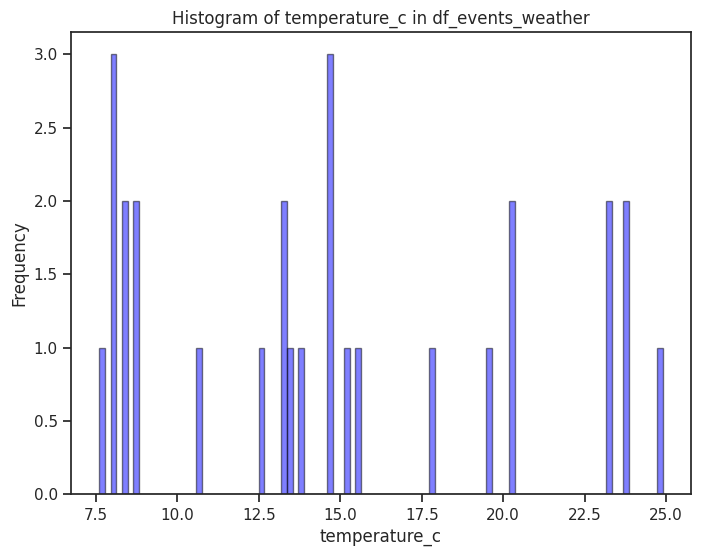

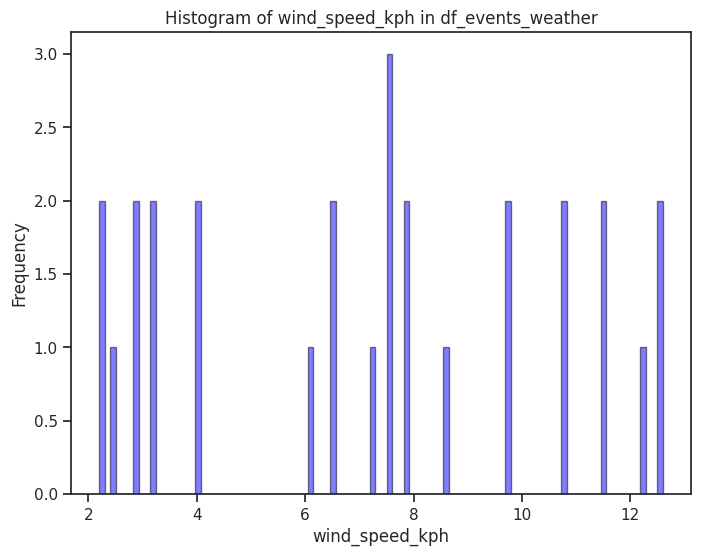

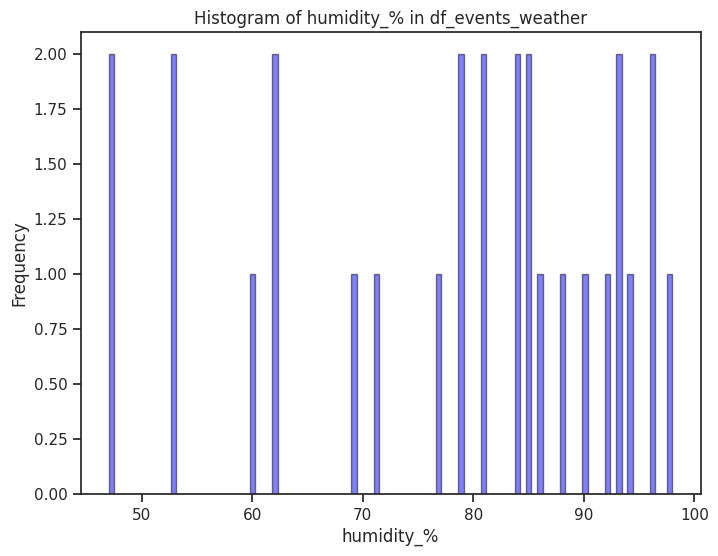

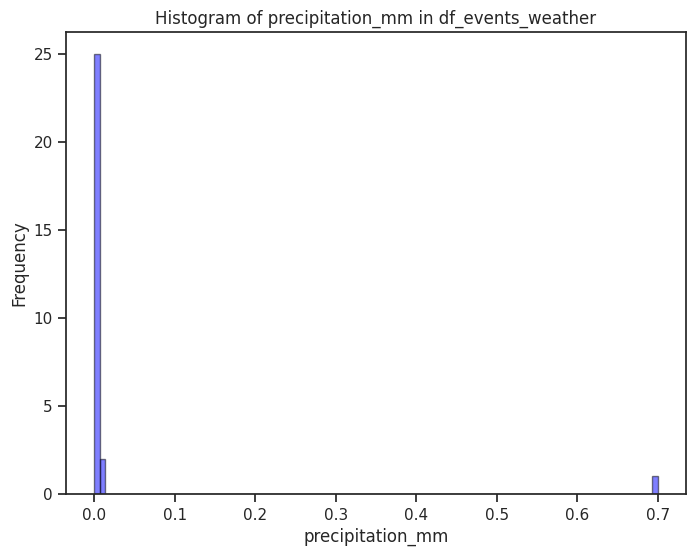

In [158]:
# kicsit áttekintem az adatokat
"""
24024
Ebben a kódban a plot_histograms függvényt definiáljuk, amely paraméterként várja a DataFrame nevét (dataframe_name).
A függvény megpróbálja betölteni a megadott DataFrame-et, és ha nem találja, hibát kezel.
Az iteráció és hisztogram kirajzolás része ugyanaz maradt. Most példa használatként megadhatod a DataFrame nevét a plot_histograms függvényben.
"""

import pandas as pd
import matplotlib.pyplot as plt

def plot_histograms(dataframe_name):
    try:
        # Betöltjük a DataFrame-et a megadott név alapján
        df = globals()[dataframe_name]

        # Iteráció az oszlopokon és hisztogramok kirajzolása egyetlen ábrán
        for column in df.columns:
            # Csak numerikus oszlopokat veszünk figyelembe (elhagyjuk a nem numerikusakat)
            if pd.api.types.is_numeric_dtype(df[column]):
                # Számold ki a MAX és MIN értékek különbségének 10%-át
                bin_width = 0.01 * (df[column].max() - df[column].min())
                # Készíts egyedi ábrát minden oszlophoz
                plt.figure(figsize=(8, 6))

                # Készíts hisztogramot a számolt bin-szélességgel
                plt.hist(df[column], bins=int((df[column].max() - df[column].min()) / bin_width),
                         color='blue', edgecolor='black', alpha=0.5)

                # Ábra címe és tengelyfeliratai
                plt.title(f'Histogram of {column} in {dataframe_name}')
                plt.xlabel(column)
                plt.ylabel('Frequency')

                # Minden egyes oszlop ábrát külön mutasd be
                plt.show()

    except KeyError:
        print(f"Error: DataFrame with name '{dataframe_name}' not found.")

# Példa használat:
plot_histograms("df_events_weather")

In [159]:
# itt írnám ki eredetileg az időjárás értékeket, mikor még lejöttek az adatok.
# Írás CSV fájlba
csv_output_path = "df_events_weather.csv"
df_events_weather.to_csv(csv_output_path, index=False)

# Ellenőrzés
print(f"DataFrame successfully written to {csv_output_path}.")

DataFrame successfully written to df_events_weather.csv.


#Adat importálások, két dataframe egyesítéséhez:

In [160]:
# most betöltöm a versenyek adatbázisát
# beolvasás CSV-ből
import pandas as pd

# DataFrame beolvasása CSV fájlból
df_EFC_CZ_realdate = pd.read_csv("df_EFC_CZ_post_analyzing_merged.csv")

# Az adatok megjelenítése
li(df_EFC_CZ_realdate)

,sorsz,division,when,who,with_who,total_time,W/L/T,hurdles,name,start,1_dog,name_1,chng,2_dog,name_2,chng_1,3_dog,name_3,chng_2,4_dog,event_place,when_date,when_time,track,W/L/T_L,W/L/T_W,W/L/T_T,track_kék,track_piros,nyert_kék_pályán,nyert_piros_pályán
0,1,13.0,1900-01-01 12:26:30,Real Ballance Flyball Team,WildRunners Zephyr,21.18,L,15.0,Chase,0.330,4.21,Rubble,0.640,4.89,Zuma,0.360,4.30,Marshall,0.30,6.14,EFC - Ring 1 (Tápiószentmárton) 2023. július 29.,2023-07-29,2024-05-12 12:26:30,kék,1,0,0,1,0,False,False
1,2,13.0,1900-01-01 12:26:30,WildRunners Zephyr,Real Ballance Flyball Team,20.49,W,25.0,Brix,-0.030,4.58,Them,0.001,5.20,Negro,0.510,4.89,Speedy,0.40,4.93,EFC - Ring 1 (Tápiószentmárton) 2023. július 29.,2023-07-29,2024-05-12 12:26:30,piros,0,1,0,0,1,False,True
2,3,13.0,1900-01-01 12:27:58,Real Ballance Flyball Team,WildRunners Zephyr,20.81,W,15.0,Chase,0.008,4.24,Rubble,0.180,5.03,Zuma,0.180,4.51,Marshall,0.24,6.42,EFC - Ring 1 (Tápiószentmárton) 2023. július 29.,2023-07-29,2024-05-12 12:27:58,kék,0,1,0,1,0,True,False
3,4,13.0,1900-01-01 12:27:58,WildRunners Zephyr,Real Ballance Flyball Team,20.85,L,25.0,Brix,0.150,4.42,Them,0.370,5.19,Negro,0.200,5.27,Speedy,1002.00,5.24,EFC - Ring 1 (Tápiószentmárton) 2023. július 29.,2023-07-29,2024-05-12 12:27:58,piros,1,0,0,0,1,False,False
4,5,13.0,1900-01-01 12:29:11,Real Ballance Flyball Team,WildRunners Zephyr,20.66,W,15.0,Chase,0.090,4.24,Rubble,0.330,5.13,Zuma,0.002,4.67,Marshall,0.12,6.09,EFC - Ring 1 (Tápiószentmárton) 2023. július 29.,2023-07-29,2024-05-12 12:29:11,kék,0,1,0,1,0,True,False
5,6,13.0,1900-01-01 12:29:11,WildRunners Zephyr,Real Ballance Flyball Team,20.96,L,25.0,Brix,0.240,4.57,Them,0.200,5.48,Negro,0.003,5.07,Speedy,0.18,5.22,EFC - Ring 1 (Tápiószentmárton) 2023. július 29.,2023-07-29,2024-05-12 12:29:11,piros,1,0,0,0,1,False,False


használat: li(df)  # Használja az 'enter' változó értékét ha létezik és nagyobb mint 0, különben az összes sort megjeleníti vagy li(df, -1)


In [161]:
# most betöltöm a versenyek adatbázisát
# beolvasás CSV-ből
import pandas as pd

# DataFrame beolvasása CSV fájlból
df_WRFT = pd.read_csv("df_WRFT_output.csv")

# Az adatok megjelenítése
li(df_WRFT)

,felvezeto,nev,fajta,nem,ivar,szuletesi_datum,kora,chip_szam,ulna_hossz,ugrasi_magassag,fajta_old,ulna_ug_mag
0,TM800418,Dexter,Kooikerhondje,kan,ivartalan,2010-02-14,14,93900005238999,14.05,25.0,Kooikerhondje,1.779359
1,NP950613,Jasper,Border collie,kan,ivartalan,2011-03-28,13,93900007189034,16.56,30.0,Border Collie,1.811594
2,UF830429,Angie,Border collie,szuka,ivartalan,2014-02-06,10,93900003827629,15.22,27.5,Border,1.806833
3,ZE801127,Alex,Border collie,kan,ivartalan,2014-04-22,10,93900003598960,17.95,32.5,Border Collie,1.810585
4,OJ941014,Bella,American staffordshire terrier,szuka,ivartalan,2015-02-27,9,93900009320601,14.70,25.0,American Staffordshire Terrier,1.700680
5,UR870607,Negro,Keverék,kan,ivartalan,2015-04-14,9,93900002110777,15.77,27.5,Keverék,1.743817


használat: li(df)  # Használja az 'enter' változó értékét ha létezik és nagyobb mint 0, különben az összes sort megjeleníti vagy li(df, -1)


In [162]:
# elkészítem az új oszlopkat az időjárásnak
from unidecode import unidecode

def add_weather_columns(df):
    # Csak a zárójelen belüli rész kiválasztása és az angolosítás
    df['Location_English'] = df['event_place'].str.extract(r'\((.*?)\)', expand=False).apply(lambda x: unidecode(x) if x else '')

    # Új oszlopok létrehozása és feltöltése NaN értékekkel
    df['temperature_c'] = float('nan')
    df['wind_speed_kph'] = float('nan')
    df['humidity_%'] = float('nan')
    df['precipitation_mm'] = float('nan')
    return df

# DataFrame kiegészítése új oszlopokkal
df_EFC_CZ_weather = add_weather_columns(df_EFC_CZ_realdate)
li(df_EFC_CZ_weather)

,sorsz,division,when,who,with_who,total_time,W/L/T,hurdles,name,start,1_dog,name_1,chng,2_dog,name_2,chng_1,3_dog,name_3,chng_2,4_dog,event_place,when_date,when_time,track,W/L/T_L,W/L/T_W,W/L/T_T,track_kék,track_piros,nyert_kék_pályán,nyert_piros_pályán,Location_English,temperature_c,wind_speed_kph,humidity_%,precipitation_mm
0,1,13.0,1900-01-01 12:26:30,Real Ballance Flyball Team,WildRunners Zephyr,21.18,L,15.0,Chase,0.330,4.21,Rubble,0.640,4.89,Zuma,0.360,4.30,Marshall,0.30,6.14,EFC - Ring 1 (Tápiószentmárton) 2023. július 29.,2023-07-29,2024-05-12 12:26:30,kék,1,0,0,1,0,False,False,Tapioszentmarton,NaN,NaN,NaN,NaN
1,2,13.0,1900-01-01 12:26:30,WildRunners Zephyr,Real Ballance Flyball Team,20.49,W,25.0,Brix,-0.030,4.58,Them,0.001,5.20,Negro,0.510,4.89,Speedy,0.40,4.93,EFC - Ring 1 (Tápiószentmárton) 2023. július 29.,2023-07-29,2024-05-12 12:26:30,piros,0,1,0,0,1,False,True,Tapioszentmarton,NaN,NaN,NaN,NaN
2,3,13.0,1900-01-01 12:27:58,Real Ballance Flyball Team,WildRunners Zephyr,20.81,W,15.0,Chase,0.008,4.24,Rubble,0.180,5.03,Zuma,0.180,4.51,Marshall,0.24,6.42,EFC - Ring 1 (Tápiószentmárton) 2023. július 29.,2023-07-29,2024-05-12 12:27:58,kék,0,1,0,1,0,True,False,Tapioszentmarton,NaN,NaN,NaN,NaN
3,4,13.0,1900-01-01 12:27:58,WildRunners Zephyr,Real Ballance Flyball Team,20.85,L,25.0,Brix,0.150,4.42,Them,0.370,5.19,Negro,0.200,5.27,Speedy,1002.00,5.24,EFC - Ring 1 (Tápiószentmárton) 2023. július 29.,2023-07-29,2024-05-12 12:27:58,piros,1,0,0,0,1,False,False,Tapioszentmarton,NaN,NaN,NaN,NaN
4,5,13.0,1900-01-01 12:29:11,Real Ballance Flyball Team,WildRunners Zephyr,20.66,W,15.0,Chase,0.090,4.24,Rubble,0.330,5.13,Zuma,0.002,4.67,Marshall,0.12,6.09,EFC - Ring 1 (Tápiószentmárton) 2023. július 29.,2023-07-29,2024-05-12 12:29:11,kék,0,1,0,1,0,True,False,Tapioszentmarton,NaN,NaN,NaN,NaN
5,6,13.0,1900-01-01 12:29:11,WildRunners Zephyr,Real Ballance Flyball Team,20.96,L,25.0,Brix,0.240,4.57,Them,0.200,5.48,Negro,0.003,5.07,Speedy,0.18,5.22,EFC - Ring 1 (Tápiószentmárton) 2023. július 29.,2023-07-29,2024-05-12 12:29:11,piros,1,0,0,0,1,False,False,Tapioszentmarton,NaN,NaN,NaN,NaN


használat: li(df)  # Használja az 'enter' változó értékét ha létezik és nagyobb mint 0, különben az összes sort megjeleníti vagy li(df, -1)


In [163]:
df_EFC_CZ_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7640 entries, 0 to 7639
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sorsz               7640 non-null   int64  
 1   division            7640 non-null   float64
 2   when                7640 non-null   object 
 3   who                 7640 non-null   object 
 4   with_who            7640 non-null   object 
 5   total_time          7640 non-null   float64
 6   W/L/T               7640 non-null   object 
 7   hurdles             7640 non-null   float64
 8   name                7640 non-null   object 
 9   start               7640 non-null   float64
 10  1_dog               7640 non-null   float64
 11  name_1              7640 non-null   object 
 12  chng                7640 non-null   float64
 13  2_dog               7640 non-null   float64
 14  name_2              7640 non-null   object 
 15  chng_1              7640 non-null   float64
 16  3_dog 

In [164]:
# beolvasás CSV-ből
import pandas as pd

# DataFrame beolvasása CSV fájlból
df_events_weather = pd.read_csv("df_events_weather.csv")

# Az adatok megjelenítése
li(df_events_weather)

,Event,Location,Date,ISO_Date,Event.1,Location_English,temperature_c,wind_speed_kph,humidity_%,precipitation_mm
0,Crazy Cup (Nové Město pod Smrkem) 2023. július 1.,Nové Město pod Smrkem,2023. július 1.,2023-07-01,Crazy Cup (Nové Město pod Smrkem) 2023. július 1-2.,Nove Mesto pod Smrkem,14.7,2.2,98.0,0.00
1,Crazy Cup (Nové Město pod Smrkem) 2023. július 2.,Nové Město pod Smrkem,2023. július 2.,2023-07-02,Crazy Cup (Nové Město pod Smrkem) 2023. július 1-2.,Nove Mesto pod Smrkem,15.5,6.1,94.0,0.70
2,Flyvaryors turnaj (Blšany) 2023. május 20.,Blšany,2023. május 20.,2023-05-20,Flyvaryors turnaj (Blšany) 2023. május 20-21.,Blsany,10.6,7.6,86.0,0.00
3,Flyvaryors turnaj (Blšany) 2023. május 21.,Blšany,2023. május 21.,2023-05-21,Flyvaryors turnaj (Blšany) 2023. május 20-21.,Blsany,13.4,10.8,92.0,0.00
4,Budějckej xtreme 2. ring (Vodňany) 2023. október 14.,Vodňany,2023. október 14.,2023-10-14,Budějckej xtreme 2. ring (Vodňany) 2023. október 14-15.,Vodnany,14.6,9.7,47.0,0.00
5,Budějckej xtreme 2. ring (Vodňany) 2023. október 15.,Vodňany,2023. október 15.,2023-10-15,Budějckej xtreme 2. ring (Vodňany) 2023. október 14-15.,Vodnany,8.4,12.6,81.0,0.01


használat: li(df)  # Használja az 'enter' változó értékét ha létezik és nagyobb mint 0, különben az összes sort megjeleníti vagy li(df, -1)


In [165]:
dinfo(df_events_weather)



DataFrame oszlopainak statisztikái:


,#,Dtype,count,unique,top,freq,mean,std,min,25%,50%,75%,max,first,last,NaN_count,unique_top,unique_top_count
Event,1,object,28,28,Crazy Cup (Nové Město pod Smrkem) 2023. július 1.,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Crazy Cup (Nové Město pod Smrkem) 2023. július 1.,EFC - Ring 2 (Tápiószentmárton) 2023. július 29.,0,Crazy Cup (Nové Město pod Smrkem) 2023. július 1.,1
Location,2,object,28,10,Blšany,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nové Město pod Smrkem,Tápiószentmárton,0,Blšany,4
Date,3,object,28,22,2023. július 29.,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023. július 1.,2023. július 29.,0,2023. július 29.,2
ISO_Date,4,object,28,22,2023-07-29,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-07-01,2023-07-29,0,2023-07-29,2
Event.1,5,object,28,16,Crazy Cup (Nové Město pod Smrkem) 2023. július 1-2.,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Crazy Cup (Nové Město pod Smrkem) 2023. július 1-2.,EFC - Ring 2 (Tápiószentmárton) 2023. július 29.,0,Crazy Cup (Nové Město pod Smrkem) 2023. július 1-2.,2
Location_English,6,object,28,10,Blsany,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nove Mesto pod Smrkem,Tapioszentmarton,0,Blsany,4
temperature_c,7,float64,28.0,NaN,NaN,NaN,14.778571,5.681507,7.6,8.7,14.2,19.675,24.9,14.7,20.2,0,8.0,3
wind_speed_kph,8,float64,28.0,NaN,NaN,NaN,7.214286,3.474107,2.2,3.8,7.6,9.975,12.6,2.2,11.5,0,7.6,3
humidity_%,9,float64,28.0,NaN,NaN,NaN,78.035714,15.619271,47.0,67.25,82.5,90.5,98.0,98.0,62.0,0,62.0,2
precipitation_mm,10,float64,28.0,NaN,NaN,NaN,0.025714,0.132174,0.0,0.0,0.0,0.0,0.7,0.0,0.0,0,0.0,25


In [166]:
# az időjárás adatok hozzáadása a versenyadatokhoz
def update_weather_data(df_events_weather, df_EFC_CZ_weather):
    for index, row in df_EFC_CZ_weather.iterrows():
        location = row['Location_English']
        date = row['when_date']
        # Keresd meg az időjárási adatokat az eseményhez tartozó dátum és helyszín alapján
        weather_data = df_events_weather[(df_events_weather['Location_English'] == location) & (df_events_weather['ISO_Date'] == date)]
        #print(location,date,weather_data)
        if not weather_data.empty:
            # Frissítsd az időjárási adatokat a megfelelő oszlopokban
            df_EFC_CZ_weather.at[index, 'temperature_c'] = weather_data.iloc[0]['temperature_c']
            df_EFC_CZ_weather.at[index, 'wind_speed_kph'] = weather_data.iloc[0]['wind_speed_kph']
            df_EFC_CZ_weather.at[index, 'humidity_%'] = weather_data.iloc[0]['humidity_%']
            df_EFC_CZ_weather.at[index, 'precipitation_mm'] = weather_data.iloc[0]['precipitation_mm']
    return df_EFC_CZ_weather

# Meghívás:
df_EFC_CZ_weather = update_weather_data(df_events_weather, df_EFC_CZ_weather)


In [167]:
# el is készült
li(df_EFC_CZ_weather)

,sorsz,division,when,who,with_who,total_time,W/L/T,hurdles,name,start,1_dog,name_1,chng,2_dog,name_2,chng_1,3_dog,name_3,chng_2,4_dog,event_place,when_date,when_time,track,W/L/T_L,W/L/T_W,W/L/T_T,track_kék,track_piros,nyert_kék_pályán,nyert_piros_pályán,Location_English,temperature_c,wind_speed_kph,humidity_%,precipitation_mm
0,1,13.0,1900-01-01 12:26:30,Real Ballance Flyball Team,WildRunners Zephyr,21.18,L,15.0,Chase,0.330,4.21,Rubble,0.640,4.89,Zuma,0.360,4.30,Marshall,0.30,6.14,EFC - Ring 1 (Tápiószentmárton) 2023. július 29.,2023-07-29,2024-05-12 12:26:30,kék,1,0,0,1,0,False,False,Tapioszentmarton,20.2,11.5,62.0,0.0
1,2,13.0,1900-01-01 12:26:30,WildRunners Zephyr,Real Ballance Flyball Team,20.49,W,25.0,Brix,-0.030,4.58,Them,0.001,5.20,Negro,0.510,4.89,Speedy,0.40,4.93,EFC - Ring 1 (Tápiószentmárton) 2023. július 29.,2023-07-29,2024-05-12 12:26:30,piros,0,1,0,0,1,False,True,Tapioszentmarton,20.2,11.5,62.0,0.0
2,3,13.0,1900-01-01 12:27:58,Real Ballance Flyball Team,WildRunners Zephyr,20.81,W,15.0,Chase,0.008,4.24,Rubble,0.180,5.03,Zuma,0.180,4.51,Marshall,0.24,6.42,EFC - Ring 1 (Tápiószentmárton) 2023. július 29.,2023-07-29,2024-05-12 12:27:58,kék,0,1,0,1,0,True,False,Tapioszentmarton,20.2,11.5,62.0,0.0
3,4,13.0,1900-01-01 12:27:58,WildRunners Zephyr,Real Ballance Flyball Team,20.85,L,25.0,Brix,0.150,4.42,Them,0.370,5.19,Negro,0.200,5.27,Speedy,1002.00,5.24,EFC - Ring 1 (Tápiószentmárton) 2023. július 29.,2023-07-29,2024-05-12 12:27:58,piros,1,0,0,0,1,False,False,Tapioszentmarton,20.2,11.5,62.0,0.0
4,5,13.0,1900-01-01 12:29:11,Real Ballance Flyball Team,WildRunners Zephyr,20.66,W,15.0,Chase,0.090,4.24,Rubble,0.330,5.13,Zuma,0.002,4.67,Marshall,0.12,6.09,EFC - Ring 1 (Tápiószentmárton) 2023. július 29.,2023-07-29,2024-05-12 12:29:11,kék,0,1,0,1,0,True,False,Tapioszentmarton,20.2,11.5,62.0,0.0
5,6,13.0,1900-01-01 12:29:11,WildRunners Zephyr,Real Ballance Flyball Team,20.96,L,25.0,Brix,0.240,4.57,Them,0.200,5.48,Negro,0.003,5.07,Speedy,0.18,5.22,EFC - Ring 1 (Tápiószentmárton) 2023. július 29.,2023-07-29,2024-05-12 12:29:11,piros,1,0,0,0,1,False,False,Tapioszentmarton,20.2,11.5,62.0,0.0


használat: li(df)  # Használja az 'enter' változó értékét ha létezik és nagyobb mint 0, különben az összes sort megjeleníti vagy li(df, -1)


In [168]:
df_EFC_CZ_weather.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7640 entries, 0 to 7639
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sorsz               7640 non-null   int64  
 1   division            7640 non-null   float64
 2   when                7640 non-null   object 
 3   who                 7640 non-null   object 
 4   with_who            7640 non-null   object 
 5   total_time          7640 non-null   float64
 6   W/L/T               7640 non-null   object 
 7   hurdles             7640 non-null   float64
 8   name                7640 non-null   object 
 9   start               7640 non-null   float64
 10  1_dog               7640 non-null   float64
 11  name_1              7640 non-null   object 
 12  chng                7640 non-null   float64
 13  2_dog               7640 non-null   float64
 14  name_2              7640 non-null   object 
 15  chng_1              7640 non-null   float64
 16  3_dog 

In [169]:
dinfo(df_EFC_CZ_weather)


DataFrame oszlopainak statisztikái:


,#,Dtype,count,unique,top,freq,mean,std,min,25%,50%,75%,max,first,last,NaN_count,unique_top,unique_top_count
sorsz,1,int64,7640.0,NaN,NaN,NaN,309.577094,202.229681,1.0,138.0,282.0,466.0,824.0,1,758,0,161,16
division,2,float64,7640.0,NaN,NaN,NaN,3.730366,2.62981,1.0,2.0,3.0,5.0,13.0,13.0,8.0,0,1.0,1684
when,3,object,7640,3960,08:13:18,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900-01-01 12:26:30,17:59:17,0,08:13:18,6
who,4,object,7640,132,The Rebels Hardcore,217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Real Ballance Flyball Team,FUNatic Jumpers,0,The Rebels Hardcore,217
with_who,5,object,7640,133,The Rebels Hardcore,213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WildRunners Zephyr,Akela Sparks,0,The Rebels Hardcore,213
total_time,6,float64,7640.0,NaN,NaN,NaN,19.754954,5.357569,11.81,16.96,18.29,19.9,86.03,21.18,25.49,0,18.05,25
W/L/T,7,object,7640,3,L,4029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L,W,0,L,4029
hurdles,8,float64,7640.0,NaN,NaN,NaN,22.741819,4.476407,15.0,20.0,25.0,27.5,32.5,15.0,15.0,0,27.5,1866
name,9,object,7640,264,Iyrai,225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chase,Pepina,0,Iyrai,225
start,10,float64,7640.0,NaN,NaN,NaN,0.099953,0.241337,-1.37,0.04,0.09,0.14,10.86,0.33,0.09,0,0.09,483


In [170]:
df=df_EFC_CZ_weather

In [171]:
import pandas as pd

# Wildrunners csapat tagjainak nevének lekérdezése
wildrunners_names = df[df['who'].str.contains('Wildrunners', case=False)]['name']

print(wildrunners_names)

1          Brix
3          Brix
5          Brix
7          Brix
9          Brix
75         Brix
77         Brix
79         Brix
82         Brix
154        Brix
156        Brix
158        Brix
         ...   
7566     Maggie
7568     Maggie
7570     Maggie
7572       Nina
7574       Nina
7576       Nina
7599    Cookies
7601    Cookies
7603    Cookies
7621       Nina
7623       Nina
7626       Nina
Name: name, Length: 1026, dtype: object


In [172]:
wildrunners_names


1          Brix
3          Brix
5          Brix
7          Brix
9          Brix
75         Brix
77         Brix
79         Brix
82         Brix
154        Brix
156        Brix
158        Brix
         ...   
7566     Maggie
7568     Maggie
7570     Maggie
7572       Nina
7574       Nina
7576       Nina
7599    Cookies
7601    Cookies
7603    Cookies
7621       Nina
7623       Nina
7626       Nina
Name: name, Length: 1026, dtype: object

In [173]:
import pandas as pd

# Filtering Wildrunners team members
wildrunners_data = df[df['who'].str.contains('Wildrunners', case=False)]

# Selecting unique names directly from the filtered DataFrame
unique_names = wildrunners_data['name'].unique()

print(unique_names)

['Brix' 'Brooke' 'Sunny' 'Enola' 'Cookies' 'Dusty' 'Falco' 'Negro'
 'Sirius' 'Bailey' 'Fleur' 'Dixie' 'Rocky' 'Dexter' 'Mason' 'Nina' 'Angie'
 'Bonnie' 'Riley' 'Gerry' 'Bree' 'Jessie' 'Jasper' 'Scotty' 'Hank' 'Rex'
 'Alex' 'Pax' 'Gordon' 'Easy' 'Kent' 'Maggie']


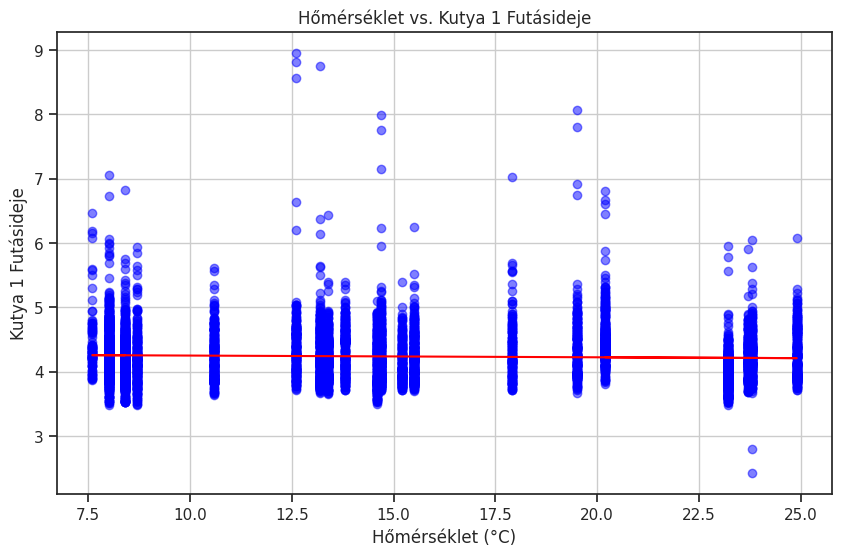

In [174]:

import matplotlib.pyplot as plt

# Adatok beolvasása és feldolgozása (példaadatként a hőmérséklet és az 1. kutya futamideje)
temperature = df_EFC_CZ_weather["temperature_c"]
dog1_time = df_EFC_CZ_realdate["1_dog"]

# Grafikon létrehozása
plt.figure(figsize=(10, 6))
plt.scatter(temperature, dog1_time, color='blue', alpha=0.5)  # Hőmérséklet és kutya futamidő scatter plot
plt.title('Hőmérséklet vs. Kutya 1 Futásideje')
plt.xlabel('Hőmérséklet (°C)')
plt.ylabel('Kutya 1 Futásideje')

# Egyenes illesztése
z = np.polyfit(temperature, dog1_time, 1)
p = np.poly1d(z)
plt.plot(temperature, p(temperature), color='red')

plt.grid(True)
plt.show()

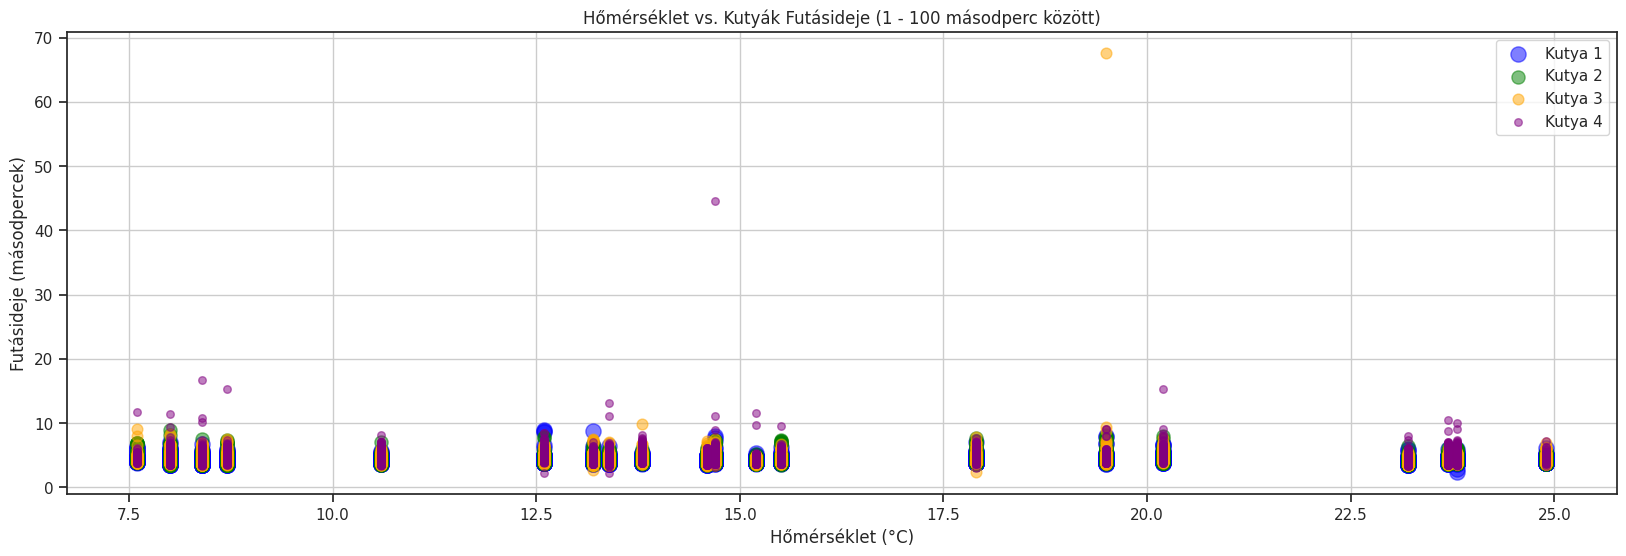

In [175]:
import matplotlib.pyplot as plt
import numpy as np

# Adatok beolvasása
temperature = df_EFC_CZ_weather["temperature_c"]
dog1_time = df_EFC_CZ_realdate["1_dog"]
dog2_time = df_EFC_CZ_realdate["2_dog"]
dog3_time = df_EFC_CZ_realdate["3_dog"]
dog4_time = df_EFC_CZ_realdate["4_dog"]

# Szűrési feltételek alkalmazása minden kutya adataira
filter1 = (dog1_time > 1) & (dog1_time < 100)
filter2 = (dog2_time > 1) & (dog2_time < 100)
filter3 = (dog3_time > 1) & (dog3_time < 100)
filter4 = (dog4_time > 1) & (dog4_time < 100)

# Grafikon létrehozása
plt.figure(figsize=(20, 6))

# Szűrt adatok megjelenítése különböző méretű pöttyökkel
plt.scatter(temperature[filter1], dog1_time[filter1], s=120, color='blue', alpha=0.5, label='Kutya 1')
plt.scatter(temperature[filter2], dog2_time[filter2], s=90, color='green', alpha=0.5, label='Kutya 2')
plt.scatter(temperature[filter3], dog3_time[filter3], s=60, color='orange', alpha=0.5, label='Kutya 3')
plt.scatter(temperature[filter4], dog4_time[filter4], s=30, color='purple', alpha=0.5, label='Kutya 4')


plt.title('Hőmérséklet vs. Kutyák Futásideje (1 - 100 másodperc között)')
plt.xlabel('Hőmérséklet (°C)')
plt.ylabel('Futásideje (másodpercek)')
plt.legend()


# Egyenes illesztése a szűrt adatokhoz
for temp, times, color in zip([temperature[filter1], temperature[filter2], temperature[filter3], temperature[filter4]],
                              [dog1_time[filter1], dog2_time[filter2], dog3_time[filter3], dog4_time[filter4]],
                              ['red', 'darkgreen', 'darkorange', 'magenta']):
    z = np.polyfit(temp, times, 1)
    p = np.poly1d(z)
    plt.plot(temp, p(temp), color=color, linestyle='none')

plt.grid(True)
plt.show()


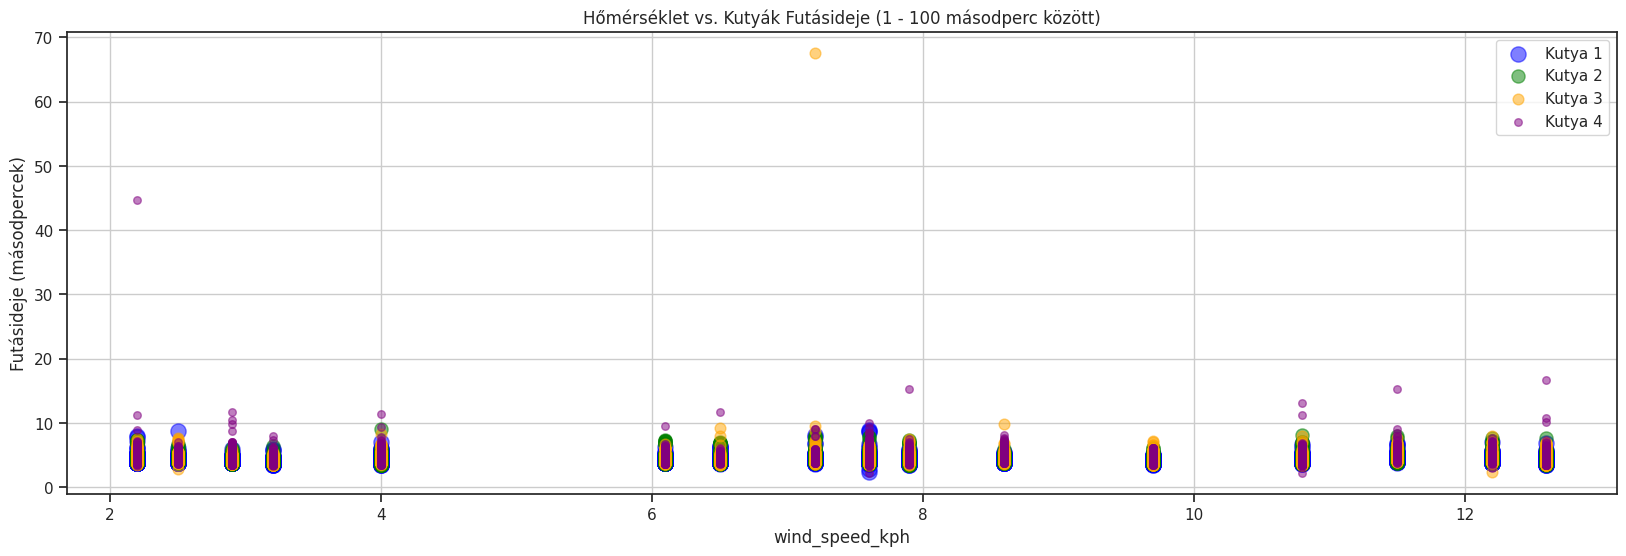

In [176]:
import matplotlib.pyplot as plt
import numpy as np

# Adatok beolvasása
temperature = df_EFC_CZ_weather["wind_speed_kph"]
dog1_time = df_EFC_CZ_realdate["1_dog"]
dog2_time = df_EFC_CZ_realdate["2_dog"]
dog3_time = df_EFC_CZ_realdate["3_dog"]
dog4_time = df_EFC_CZ_realdate["4_dog"]

# Szűrési feltételek alkalmazása minden kutya adataira
filter1 = (dog1_time > 1) & (dog1_time < 100)
filter2 = (dog2_time > 1) & (dog2_time < 100)
filter3 = (dog3_time > 1) & (dog3_time < 100)
filter4 = (dog4_time > 1) & (dog4_time < 100)

# Grafikon létrehozása
plt.figure(figsize=(20, 6))

# Szűrt adatok megjelenítése különböző méretű pöttyökkel
plt.scatter(temperature[filter1], dog1_time[filter1], s=120, color='blue', alpha=0.5, label='Kutya 1')
plt.scatter(temperature[filter2], dog2_time[filter2], s=90, color='green', alpha=0.5, label='Kutya 2')
plt.scatter(temperature[filter3], dog3_time[filter3], s=60, color='orange', alpha=0.5, label='Kutya 3')
plt.scatter(temperature[filter4], dog4_time[filter4], s=30, color='purple', alpha=0.5, label='Kutya 4')


plt.title('Hőmérséklet vs. Kutyák Futásideje (1 - 100 másodperc között)')
plt.xlabel('wind_speed_kph')
plt.ylabel('Futásideje (másodpercek)')
plt.legend()


# Egyenes illesztése a szűrt adatokhoz
for temp, times, color in zip([temperature[filter1], temperature[filter2], temperature[filter3], temperature[filter4]],
                              [dog1_time[filter1], dog2_time[filter2], dog3_time[filter3], dog4_time[filter4]],
                              ['red', 'darkgreen', 'darkorange', 'magenta']):
    z = np.polyfit(temp, times, 1)
    p = np.poly1d(z)
    plt.plot(temp, p(temp), color=color, linestyle='none')

plt.grid(True)
plt.show()


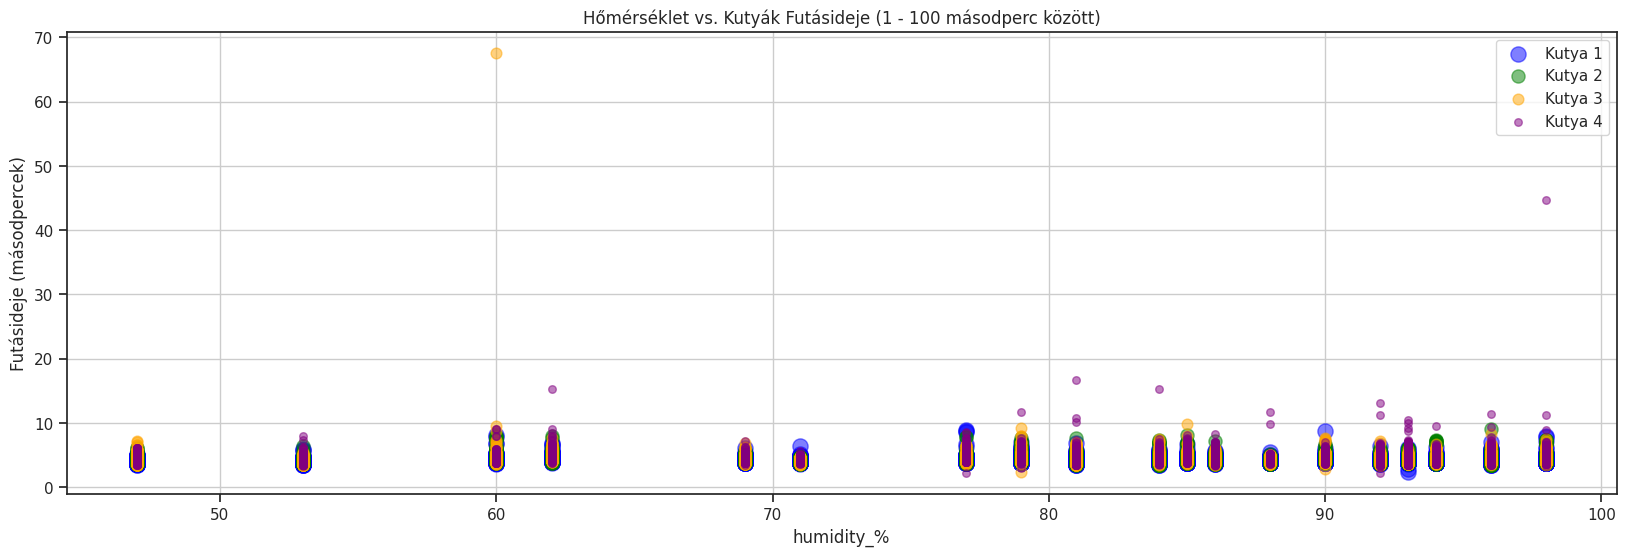

In [177]:
import matplotlib.pyplot as plt
import numpy as np

# Adatok beolvasása
temperature = df_EFC_CZ_weather["humidity_%"]
dog1_time = df_EFC_CZ_realdate["1_dog"]
dog2_time = df_EFC_CZ_realdate["2_dog"]
dog3_time = df_EFC_CZ_realdate["3_dog"]
dog4_time = df_EFC_CZ_realdate["4_dog"]

# Szűrési feltételek alkalmazása minden kutya adataira
filter1 = (dog1_time > 1) & (dog1_time < 100)
filter2 = (dog2_time > 1) & (dog2_time < 100)
filter3 = (dog3_time > 1) & (dog3_time < 100)
filter4 = (dog4_time > 1) & (dog4_time < 100)

# Grafikon létrehozása
plt.figure(figsize=(20, 6))

# Szűrt adatok megjelenítése különböző méretű pöttyökkel
plt.scatter(temperature[filter1], dog1_time[filter1], s=120, color='blue', alpha=0.5, label='Kutya 1')
plt.scatter(temperature[filter2], dog2_time[filter2], s=90, color='green', alpha=0.5, label='Kutya 2')
plt.scatter(temperature[filter3], dog3_time[filter3], s=60, color='orange', alpha=0.5, label='Kutya 3')
plt.scatter(temperature[filter4], dog4_time[filter4], s=30, color='purple', alpha=0.5, label='Kutya 4')


plt.title('Hőmérséklet vs. Kutyák Futásideje (1 - 100 másodperc között)')
plt.xlabel('humidity_%')
plt.ylabel('Futásideje (másodpercek)')
plt.legend()


# Egyenes illesztése a szűrt adatokhoz
for temp, times, color in zip([temperature[filter1], temperature[filter2], temperature[filter3], temperature[filter4]],
                              [dog1_time[filter1], dog2_time[filter2], dog3_time[filter3], dog4_time[filter4]],
                              ['red', 'darkgreen', 'darkorange', 'magenta']):
    z = np.polyfit(temp, times, 1)
    p = np.poly1d(z)
    plt.plot(temp, p(temp), color=color, linestyle='none')

plt.grid(True)
plt.show()


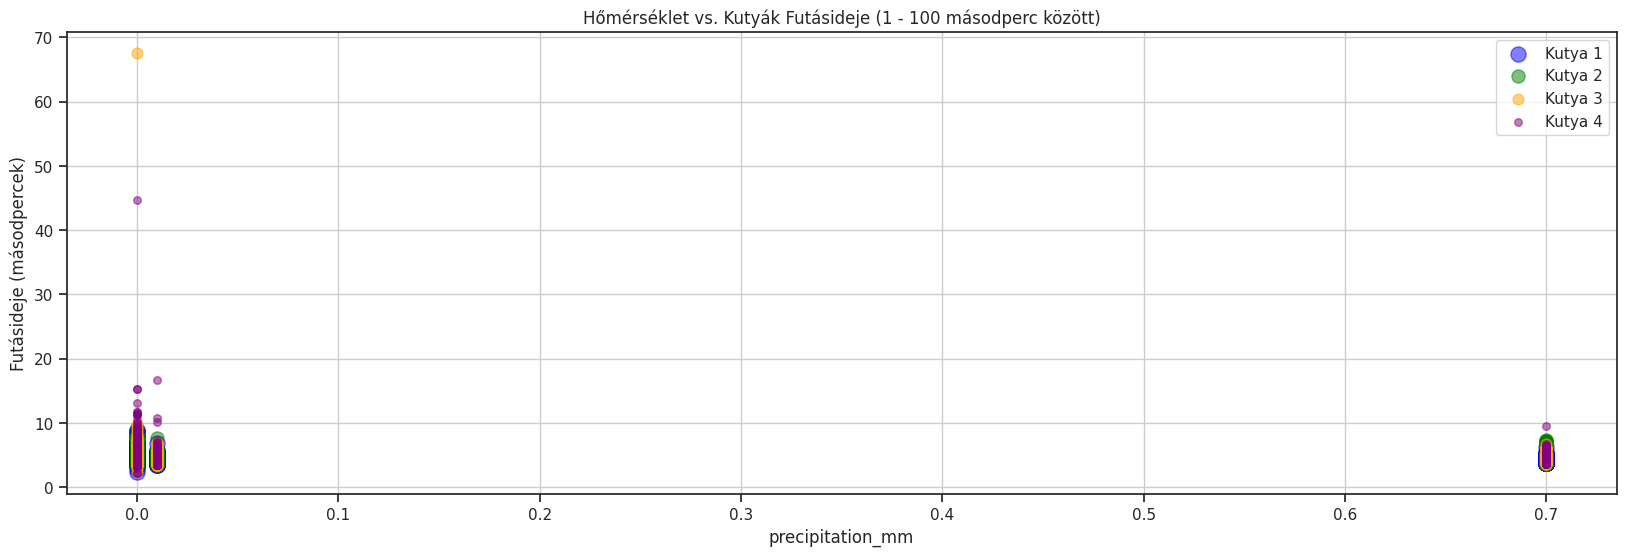

In [178]:
import matplotlib.pyplot as plt
import numpy as np

# Adatok beolvasása
temperature = df_EFC_CZ_weather["precipitation_mm"]
dog1_time = df_EFC_CZ_realdate["1_dog"]
dog2_time = df_EFC_CZ_realdate["2_dog"]
dog3_time = df_EFC_CZ_realdate["3_dog"]
dog4_time = df_EFC_CZ_realdate["4_dog"]

# Szűrési feltételek alkalmazása minden kutya adataira
filter1 = (dog1_time > 1) & (dog1_time < 100)
filter2 = (dog2_time > 1) & (dog2_time < 100)
filter3 = (dog3_time > 1) & (dog3_time < 100)
filter4 = (dog4_time > 1) & (dog4_time < 100)

# Grafikon létrehozása
plt.figure(figsize=(20, 6))

# Szűrt adatok megjelenítése különböző méretű pöttyökkel
plt.scatter(temperature[filter1], dog1_time[filter1], s=120, color='blue', alpha=0.5, label='Kutya 1')
plt.scatter(temperature[filter2], dog2_time[filter2], s=90, color='green', alpha=0.5, label='Kutya 2')
plt.scatter(temperature[filter3], dog3_time[filter3], s=60, color='orange', alpha=0.5, label='Kutya 3')
plt.scatter(temperature[filter4], dog4_time[filter4], s=30, color='purple', alpha=0.5, label='Kutya 4')


plt.title('Hőmérséklet vs. Kutyák Futásideje (1 - 100 másodperc között)')
plt.xlabel('precipitation_mm')
plt.ylabel('Futásideje (másodpercek)')
plt.legend()


# Egyenes illesztése a szűrt adatokhoz
for temp, times, color in zip([temperature[filter1], temperature[filter2], temperature[filter3], temperature[filter4]],
                              [dog1_time[filter1], dog2_time[filter2], dog3_time[filter3], dog4_time[filter4]],
                              ['red', 'darkgreen', 'darkorange', 'magenta']):
    z = np.polyfit(temp, times, 1)
    p = np.poly1d(z)
    plt.plot(temp, p(temp), color=color, linestyle='none')

plt.grid(True)
plt.show()


###Szerintem a grafikonokból jól látható, hogy az időjárási körülmények ezeken a versenyeken nem jelentősen befolyásolták az eredményeket.

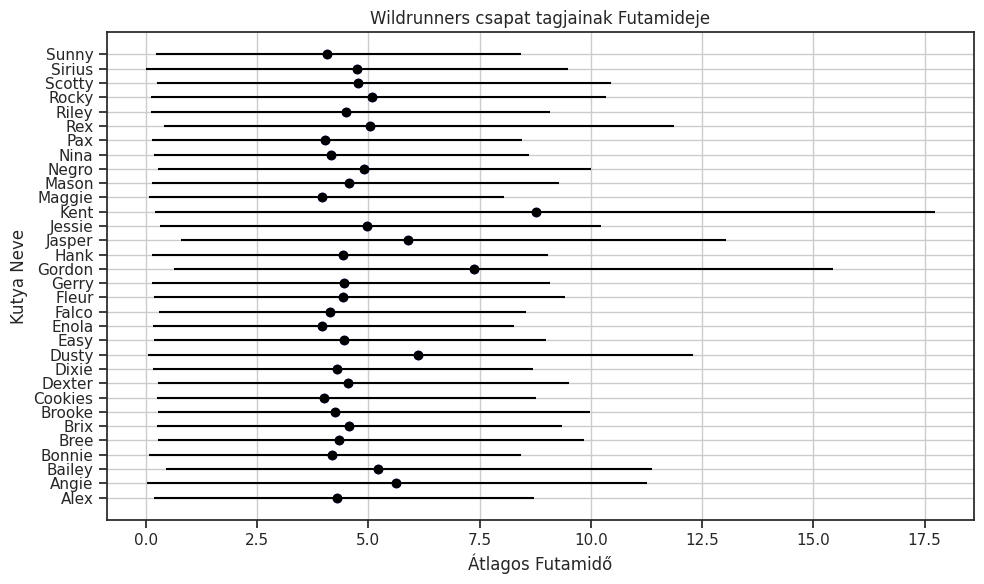

In [179]:
import matplotlib.pyplot as plt

# Wildrunners csapat tagjainak legjobb, legrosszabb és átlagos futamideje
wildrunners_data = df[df['who'].str.contains('Wildrunners', case=False)]
aggregated_data = wildrunners_data.groupby('name')[ '1_dog'].agg(['min', 'max', 'mean']).reset_index()

# Grafikon létrehozása
plt.figure(figsize=(10, 6))
plt.scatter(aggregated_data['mean'], aggregated_data['name'], color='blue', alpha=0.7)  # Átlagos futamidő és név scatter plot
plt.errorbar(aggregated_data['mean'], aggregated_data['name'], xerr=[aggregated_data['min'], aggregated_data['max']], fmt='o', color='black')  # Hibaoszlopok hozzáadása
plt.title('Wildrunners csapat tagjainak Futamideje')
plt.xlabel('Átlagos Futamidő')
plt.ylabel('Kutya Neve')
plt.grid(True)
plt.tight_layout()

plt.show()

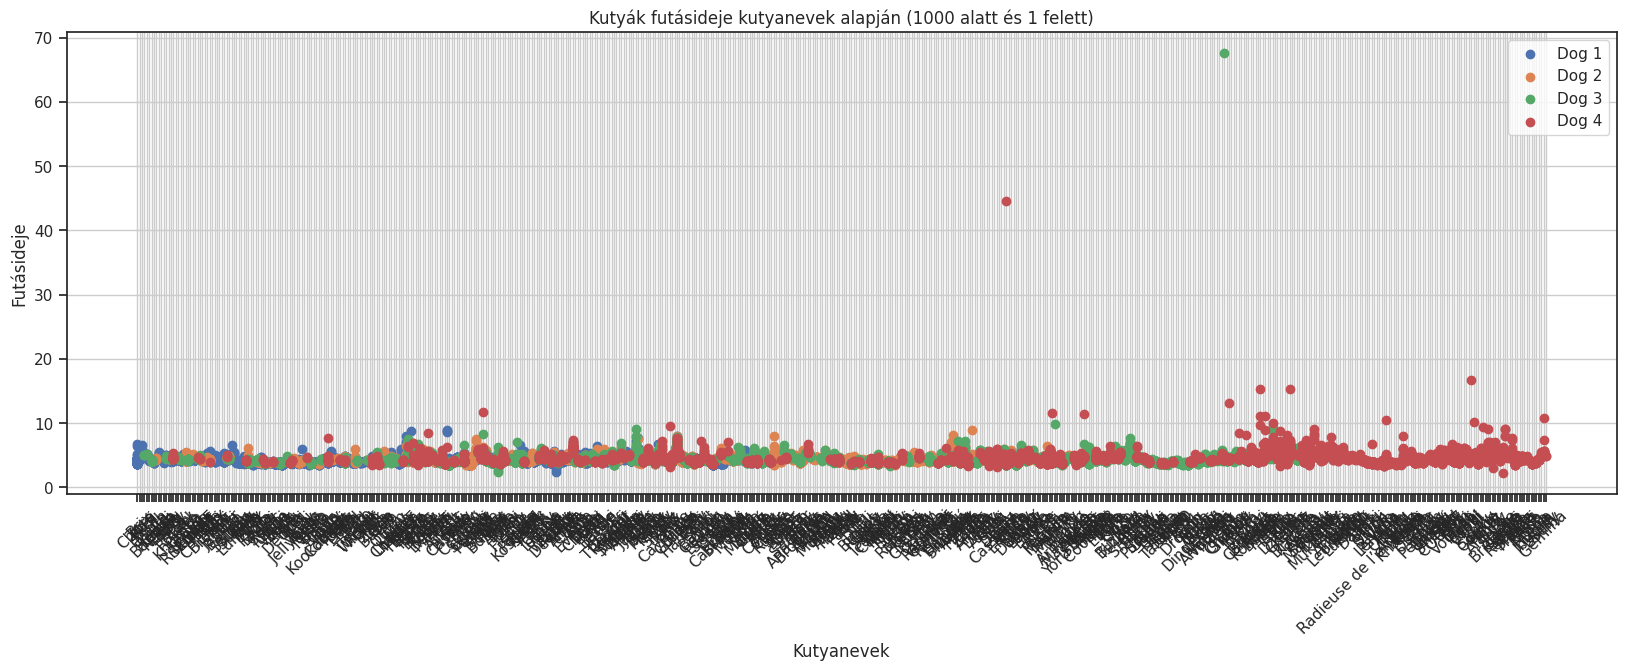

In [180]:
import matplotlib.pyplot as plt

# Kutyanevek és futásidejek kiválasztása az 1000 alatti és 1 feletti értékekkel
df_filtered = df_EFC_CZ_weather[(df_EFC_CZ_weather['1_dog'] < 1000) &
                                 (df_EFC_CZ_weather['1_dog'] > 1) &
                                 (df_EFC_CZ_weather['2_dog'] < 1000) &
                                 (df_EFC_CZ_weather['2_dog'] > 1) &
                                 (df_EFC_CZ_weather['3_dog'] < 1000) &
                                 (df_EFC_CZ_weather['3_dog'] > 1) &
                                 (df_EFC_CZ_weather['4_dog'] < 1000) &
                                 (df_EFC_CZ_weather['4_dog'] > 1)]

kutyanevek = df_filtered[['name', 'name_1', 'name_2', 'name_3']]
futasidejek = df_filtered[['1_dog', '2_dog', '3_dog', '4_dog']]

# Pontgrafikon létrehozása
plt.figure(figsize=(20, 6))

# Pontok ábrázolása a kutyanevek alapján
for i in range(len(kutyanevek.columns)):
    plt.scatter(kutyanevek.iloc[:, i], futasidejek.iloc[:, i], label=f'Dog {i+1}')

plt.xlabel('Kutyanevek')
plt.ylabel('Futásideje')
plt.title('Kutyák futásideje kutyanevek alapján (1000 alatt és 1 felett)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


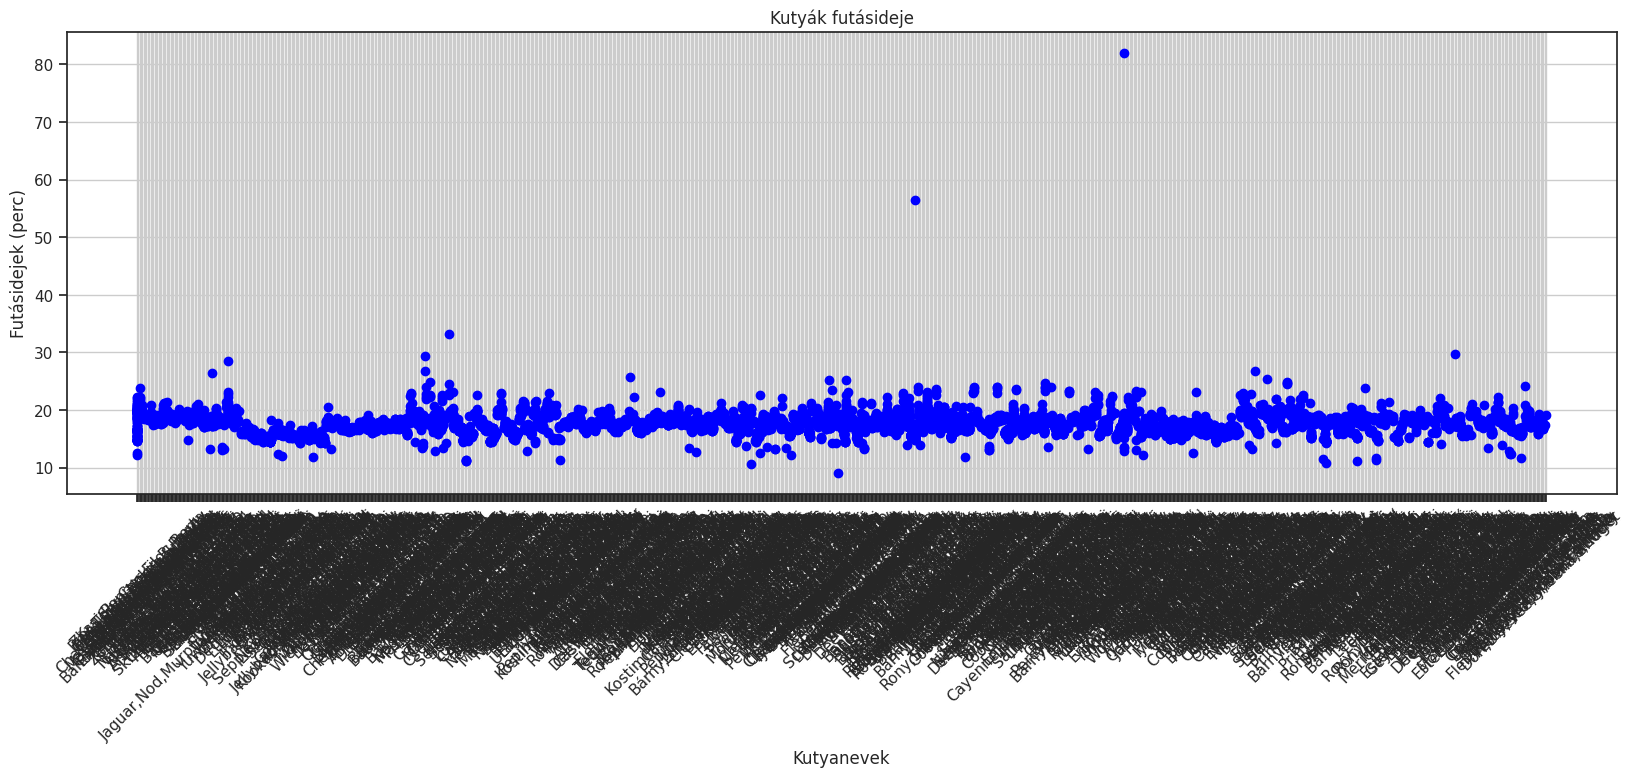

In [181]:
# 'NAME' és 'DOG' oszlopok létrehozása
# Egyedi értékek kiválogatása és összekapcsolása vesszővel
df['NAME'] = df[['name', 'name_1', 'name_2', 'name_3']].apply(lambda x: ','.join(x.drop_duplicates()), axis=1)
df['DOG'] = df[['1_dog', '2_dog', '3_dog', '4_dog']].sum(axis=1)

# Csak az 800 alatti és 1 feletti értékek kiválogatása
filtered_dog_values = df[['1_dog', '2_dog', '3_dog', '4_dog']].apply(lambda x: x[(x > 1) & (x < 800)], axis=1)

# 'DOG' oszlop létrehozása az új szűrt értékekkel
df['DOG'] = filtered_dog_values.sum(axis=1)


# Pontgrafikon létrehozása
plt.figure(figsize=(20, 6))
plt.scatter(df['NAME'], df['DOG'], color='blue')
plt.xlabel('Kutyanevek')
plt.ylabel('Futásidejek (perc)')
plt.title('Kutyák futásideje')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


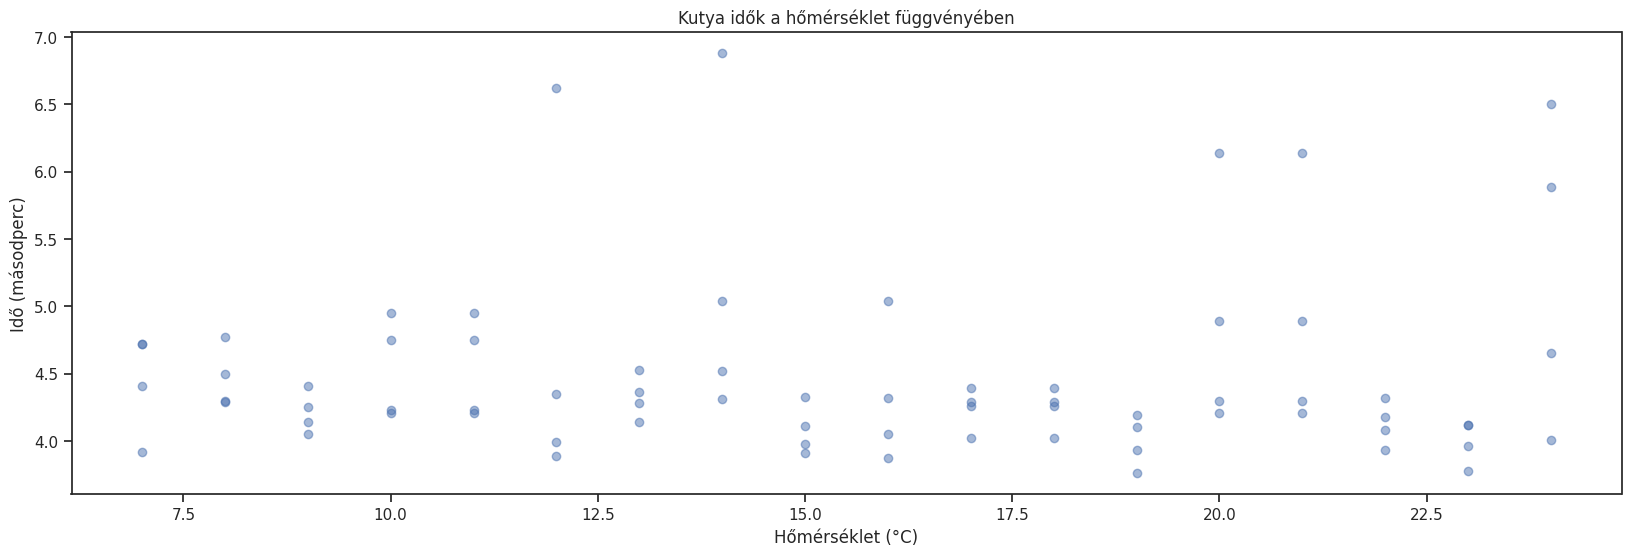

In [182]:
import matplotlib.pyplot as plt

# Hőmérséklet tartomány létrehozása
temperature_range = range(int(df_EFC_CZ_weather['temperature_c'].min()), int(df_EFC_CZ_weather['temperature_c'].max()) + 1)

# Ábrázolás
plt.figure(figsize=(20, 6))

# Minden egyes hőmérsékletértékhez 1 fokonként csinálunk iterációt
for temp in temperature_range:
    # Legközelebbi hőmérséklet megtalálása az adott értékhez
    closest_temp_row = df_EFC_CZ_weather.iloc[(df_EFC_CZ_weather['temperature_c'] - temp).abs().argsort()[:1]]
    # Az adott hőmérsékleten mért kutyaidejek
    dog_times = [closest_temp_row[dog].values[0] for dog in ['1_dog', '2_dog', '3_dog', '4_dog']]
    # Pontok ábrázolása
    plt.plot([temp] * len(dog_times), dog_times, 'bo', alpha=0.5)

# Tengelyek és cím beállítása
plt.xlabel('Hőmérséklet (°C)')
plt.ylabel('Idő (másodperc)')
plt.title('Kutya idők a hőmérséklet függvényében')

# Ábrázolás megjelenítése
plt.show()



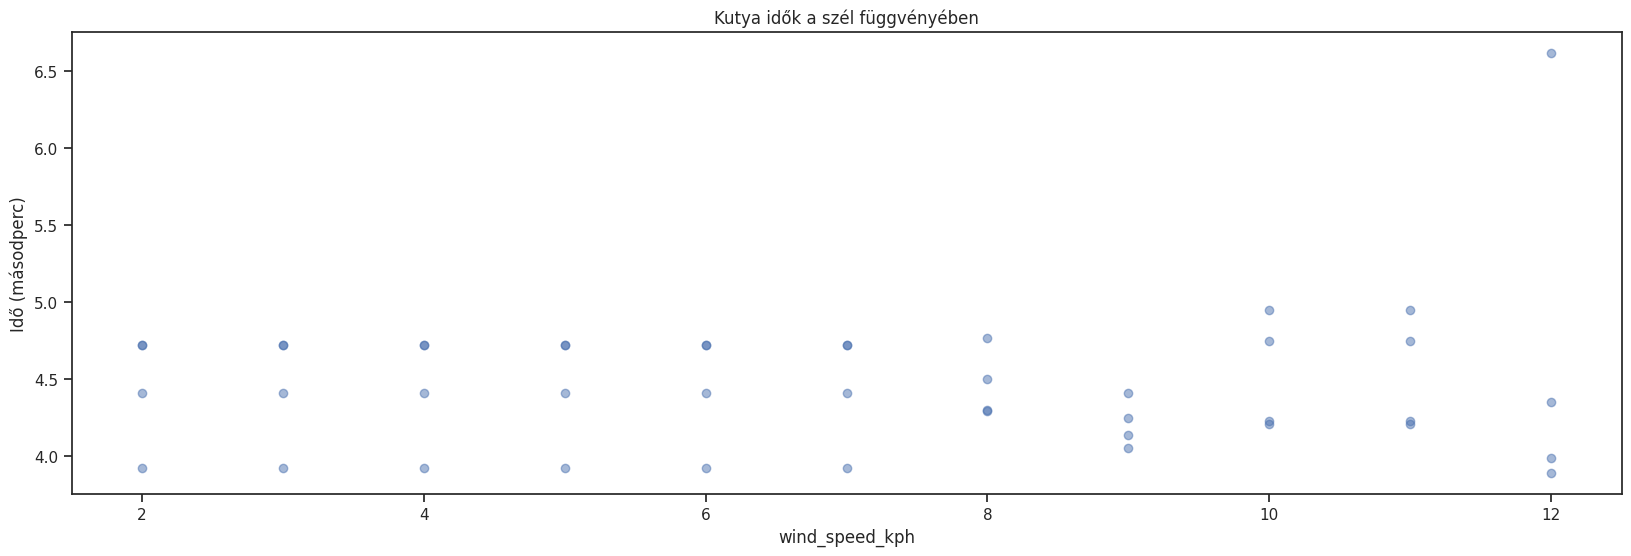

In [183]:
import matplotlib.pyplot as plt

# Hőmérséklet tartomány létrehozása
temperature_range = range(int(df_EFC_CZ_weather['wind_speed_kph'].min()), int(df_EFC_CZ_weather['wind_speed_kph'].max()) + 1)

# Ábrázolás
plt.figure(figsize=(20, 6))

# Minden egyes hőmérsékletértékhez 1 fokonként csinálunk iterációt
for temp in temperature_range:
    # Legközelebbi hőmérséklet megtalálása az adott értékhez
    closest_temp_row = df_EFC_CZ_weather.iloc[(df_EFC_CZ_weather['temperature_c'] - temp).abs().argsort()[:1]]
    # Az adott hőmérsékleten mért kutyaidejek
    dog_times = [closest_temp_row[dog].values[0] for dog in ['1_dog', '2_dog', '3_dog', '4_dog']]
    # Pontok ábrázolása
    plt.plot([temp] * len(dog_times), dog_times, 'bo', alpha=0.5)

# Tengelyek és cím beállítása
plt.xlabel('wind_speed_kph')
plt.ylabel('Idő (másodperc)')
plt.title('Kutya idők a szél függvényében')

# Ábrázolás megjelenítése
plt.show()

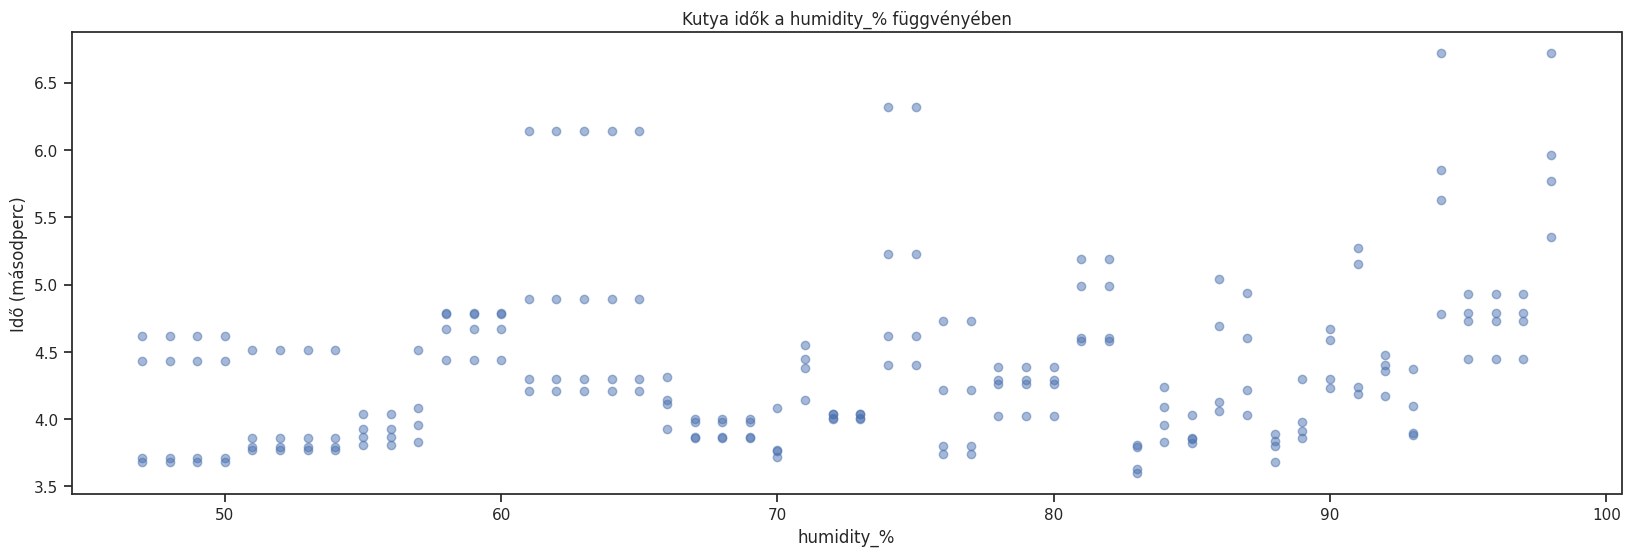

In [184]:
import matplotlib.pyplot as plt

# Hőmérséklet tartomány létrehozása
temperature_range = range(int(df_EFC_CZ_weather['humidity_%'].min()), int(df_EFC_CZ_weather['humidity_%'].max()) + 1)

# Ábrázolás
plt.figure(figsize=(20, 6))

# Minden egyes hőmérsékletértékhez 1 fokonként csinálunk iterációt
for temp in temperature_range:
    # Legközelebbi hőmérséklet megtalálása az adott értékhez
    closest_temp_row = df_EFC_CZ_weather.iloc[(df_EFC_CZ_weather['humidity_%'] - temp).abs().argsort()[:1]]
    # Az adott hőmérsékleten mért kutyaidejek
    dog_times = [closest_temp_row[dog].values[0] for dog in ['1_dog', '2_dog', '3_dog', '4_dog']]
    # Pontok ábrázolása
    plt.plot([temp] * len(dog_times), dog_times, 'bo', alpha=0.5)

# Tengelyek és cím beállítása
plt.xlabel('humidity_%')
plt.ylabel('Idő (másodperc)')
plt.title('Kutya idők a humidity_% függvényében')

# Ábrázolás megjelenítése
plt.show()

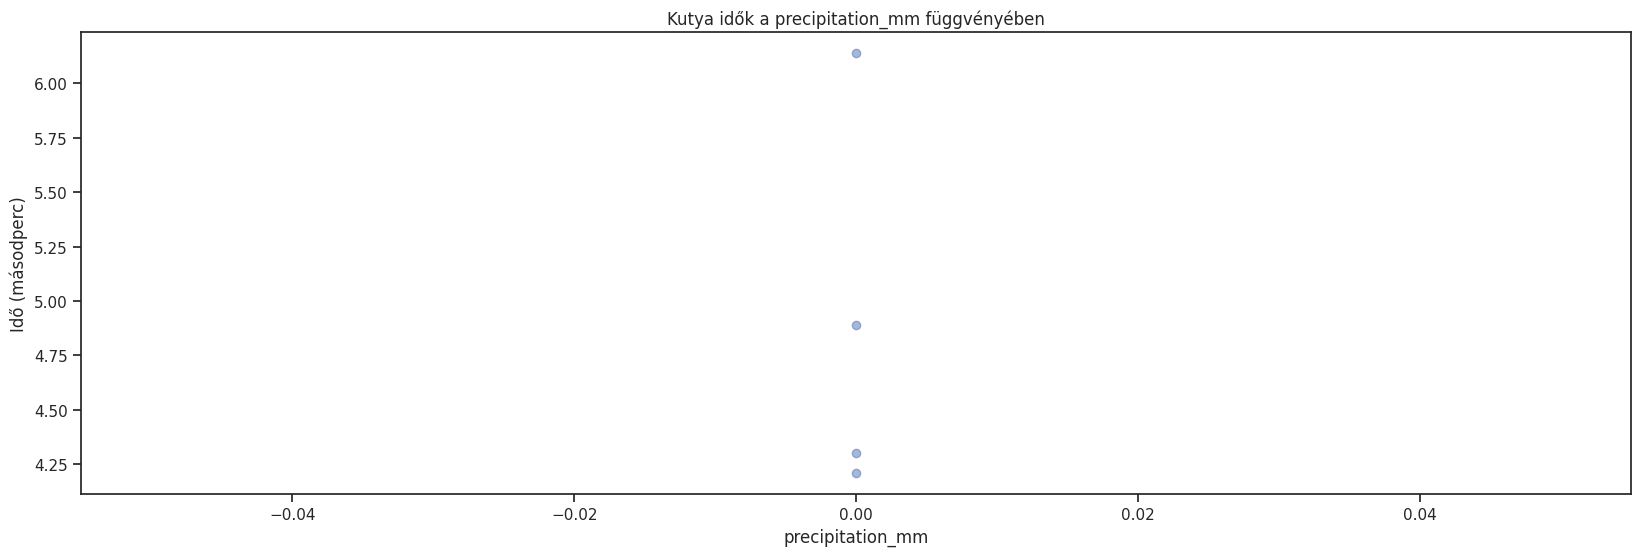

In [185]:
import matplotlib.pyplot as plt

# Hőmérséklet tartomány létrehozása
temperature_range = range(int(df_EFC_CZ_weather['precipitation_mm'].min()), int(df_EFC_CZ_weather['precipitation_mm'].max()) + 1)

# Ábrázolás
plt.figure(figsize=(20, 6))

# Minden egyes hőmérsékletértékhez 1 fokonként csinálunk iterációt
for temp in temperature_range:
    # Legközelebbi hőmérséklet megtalálása az adott értékhez
    closest_temp_row = df_EFC_CZ_weather.iloc[(df_EFC_CZ_weather['precipitation_mm'] - temp).abs().argsort()[:1]]
    # Az adott hőmérsékleten mért kutyaidejek
    dog_times = [closest_temp_row[dog].values[0] for dog in ['1_dog', '2_dog', '3_dog', '4_dog']]
    # Pontok ábrázolása
    plt.plot([temp] * len(dog_times), dog_times, 'bo', alpha=0.5)

# Tengelyek és cím beállítása
plt.xlabel('precipitation_mm')
plt.ylabel('Idő (másodperc)')
plt.title('Kutya idők a precipitation_mm függvényében')

# Ábrázolás megjelenítése
plt.show()

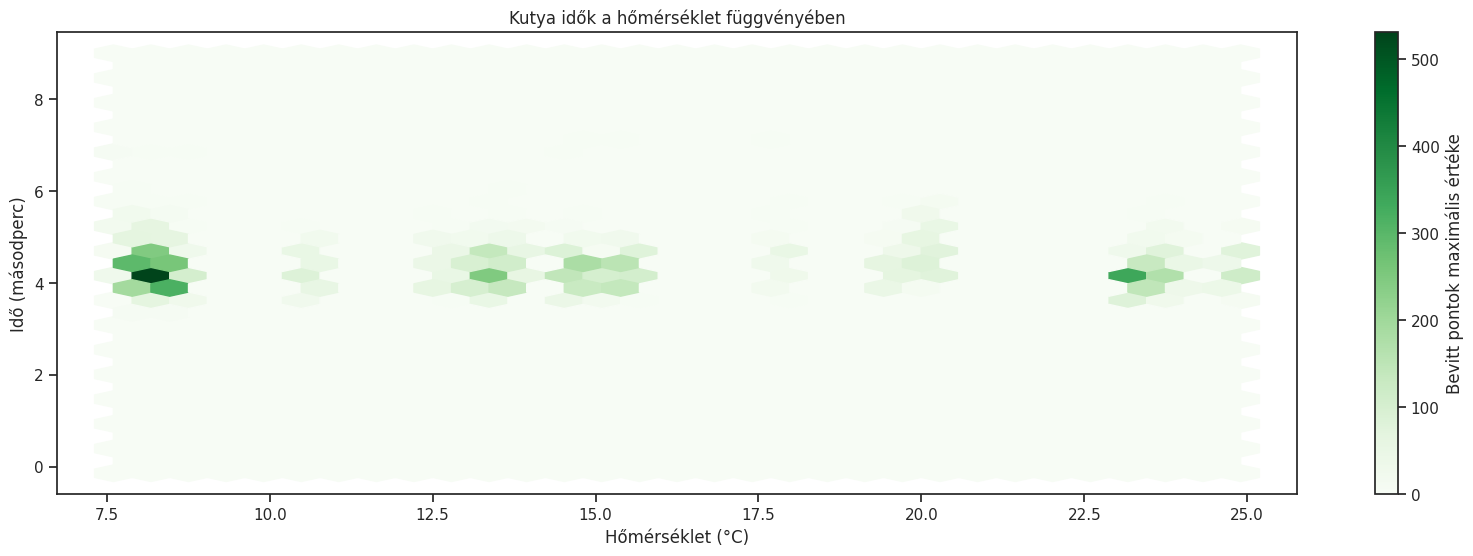

In [186]:
import matplotlib.pyplot as plt
import numpy as np

# Tisztítjuk az adatokat, csak számokat tartalmazó oszlopokat tartunk meg
df_EFC_CZ_weather_cleaned = df_EFC_CZ_weather[['temperature_c', '1_dog', '2_dog','3_dog', '4_dog']].apply(pd.to_numeric, errors='coerce').dropna()

# Ábrázolás
plt.figure(figsize=(20, 6))

# Hexbin ábrázolás a kutyaidejekkel és a hőmérséklettel
plt.hexbin(df_EFC_CZ_weather_cleaned['temperature_c'], df_EFC_CZ_weather_cleaned['2_dog'], gridsize=30, cmap='Greens', reduce_C_function=max)


# Tengelyek és cím beállítása
plt.xlabel('Hőmérséklet (°C)')
plt.ylabel('Idő (másodperc)')
plt.title('Kutya idők a hőmérséklet függvényében')

# Színmagyarázat hozzáadása
plt.colorbar(label='Bevitt pontok maximális értéke')

# Ábrázolás megjelenítése
plt.show()


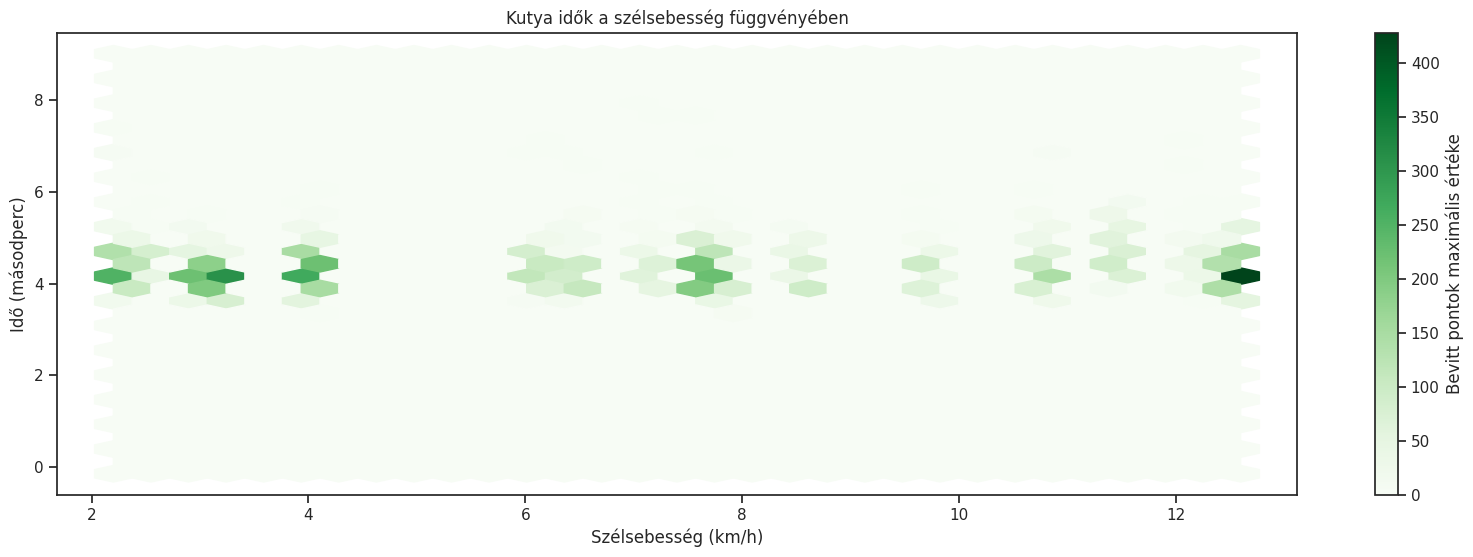

In [187]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# A feltételezés, hogy a 'df_EFC_CZ_weather' DataFrame már tartalmazza a 'wind_speed_kph' oszlopot.
# Adatok tisztítása, csak számokat tartalmazó oszlopokat tartunk meg
df_EFC_CZ_weather_cleaned = df_EFC_CZ_weather[['wind_speed_kph', '1_dog', '2_dog', '3_dog', '4_dog']].apply(pd.to_numeric, errors='coerce').dropna()

# Ábrázolás
plt.figure(figsize=(20, 6))

# Hexbin ábrázolás a második kutya idejével és a szélsebességgel
plt.hexbin(df_EFC_CZ_weather_cleaned['wind_speed_kph'], df_EFC_CZ_weather_cleaned['2_dog'], gridsize=30, cmap='Greens', reduce_C_function=max)

# Tengelyek és cím beállítása
plt.xlabel('Szélsebesség (km/h)')
plt.ylabel('Idő (másodperc)')
plt.title('Kutya idők a szélsebesség függvényében')

# Színmagyarázat hozzáadása
plt.colorbar(label='Bevitt pontok maximális értéke')

# Ábrázolás megjelenítése
plt.show()



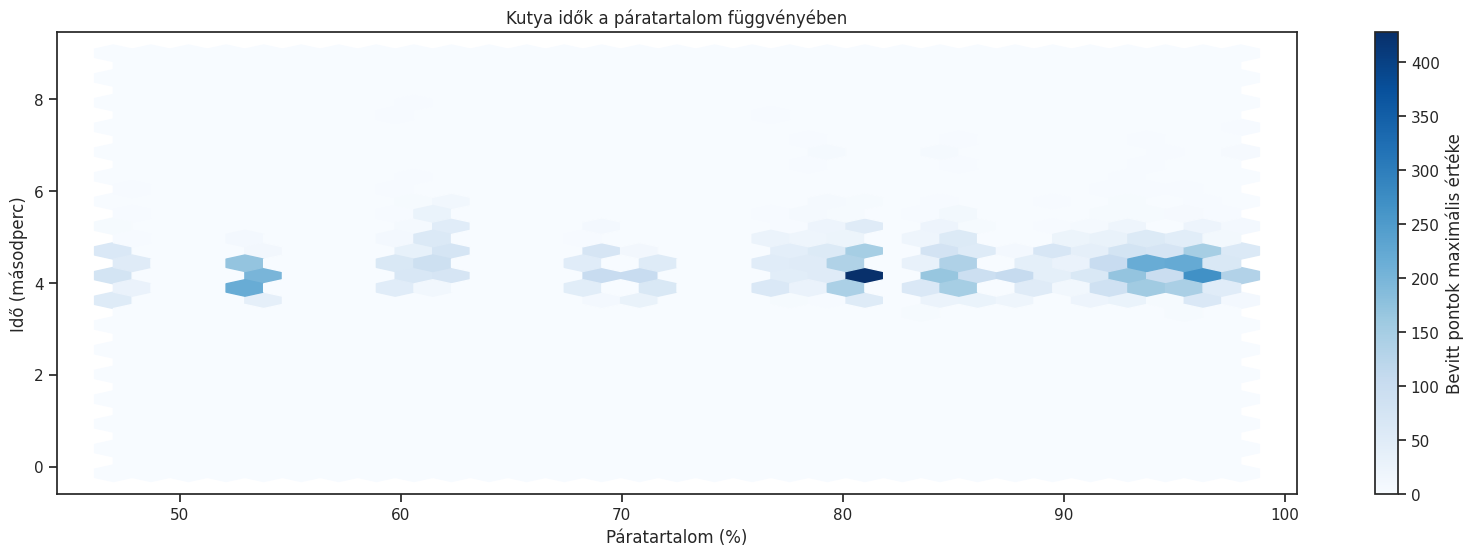

In [188]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Feltételezve, hogy a 'df_EFC_CZ_weather' DataFrame tartalmaz egy 'humidity_%' oszlopot.
# Adatok tisztítása, csak számokat tartalmazó oszlopokat tartunk meg
df_EFC_CZ_weather_cleaned = df_EFC_CZ_weather[['humidity_%', '1_dog', '2_dog', '3_dog', '4_dog']].apply(pd.to_numeric, errors='coerce').dropna()

# Ábrázolás
plt.figure(figsize=(20, 6))

# Hexbin ábrázolás a második kutya idejével és a páratartalommal
plt.hexbin(df_EFC_CZ_weather_cleaned['humidity_%'], df_EFC_CZ_weather_cleaned['2_dog'], gridsize=30, cmap='Blues', reduce_C_function=max)

# Tengelyek és cím beállítása
plt.xlabel('Páratartalom (%)')
plt.ylabel('Idő (másodperc)')
plt.title('Kutya idők a páratartalom függvényében')

# Színmagyarázat hozzáadása
plt.colorbar(label='Bevitt pontok maximális értéke')

# Ábrázolás megjelenítése
plt.show()


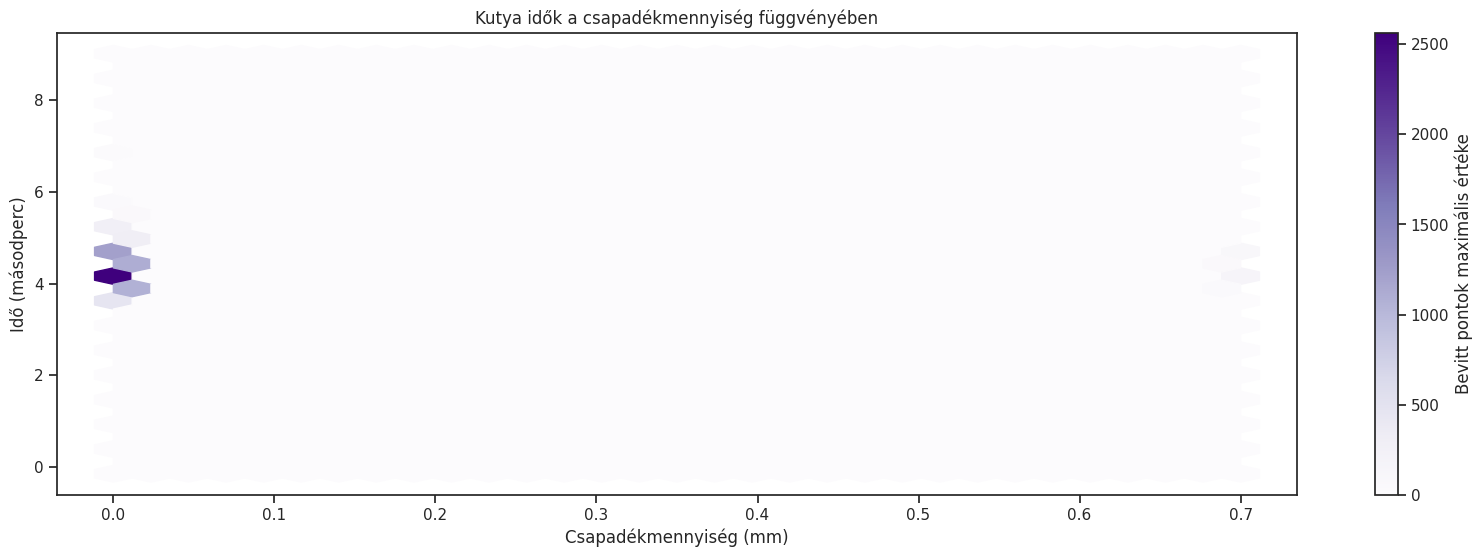

In [189]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# A 'df_EFC_CZ_weather' DataFrame-ből kiindulva, feltételezzük, hogy tartalmaz egy 'precipitation_mm' oszlopot.
# Adatok tisztítása, csak számokat tartalmazó oszlopokat tartunk meg
df_EFC_CZ_weather_cleaned = df_EFC_CZ_weather[['precipitation_mm', '1_dog', '2_dog', '3_dog', '4_dog']].apply(pd.to_numeric, errors='coerce').dropna()

# Ábrázolás
plt.figure(figsize=(20, 6))

# Hexbin ábrázolás a második kutya idejével és a csapadékmennyiséggel
plt.hexbin(df_EFC_CZ_weather_cleaned['precipitation_mm'], df_EFC_CZ_weather_cleaned['2_dog'], gridsize=30, cmap='Purples', reduce_C_function=max)

# Tengelyek és cím beállítása
plt.xlabel('Csapadékmennyiség (mm)')
plt.ylabel('Idő (másodperc)')
plt.title('Kutya idők a csapadékmennyiség függvényében')

# Színmagyarázat hozzáadása
plt.colorbar(label='Bevitt pontok maximális értéke')

# Ábrázolás megjelenítése
plt.show()


In [190]:
# Írás CSV fájlba
csv_output_path = "df_EFC_CZ_Weather.csv"
df_EFC_CZ_weather.to_csv(csv_output_path, index=False)

# Ellenőrzés
print(f"DataFrame successfully written to {csv_output_path}.")


DataFrame successfully written to df_EFC_CZ_Weather.csv.


## Innentől már csak visszaellenőrzés

In [191]:
import pandas as pd

# DataFrame beolvasása CSV fájlból
df_EFC_CZ_weather_output = pd.read_csv("df_EFC_CZ_Weather.csv")

# Az adatok megjelenítése
li(df_EFC_CZ_weather_output)

,sorsz,division,when,who,with_who,total_time,W/L/T,hurdles,name,start,1_dog,name_1,chng,2_dog,name_2,chng_1,3_dog,name_3,chng_2,4_dog,event_place,when_date,when_time,track,W/L/T_L,W/L/T_W,W/L/T_T,track_kék,track_piros,nyert_kék_pályán,nyert_piros_pályán,Location_English,temperature_c,wind_speed_kph,humidity_%,precipitation_mm,NAME,DOG
0,1,13.0,1900-01-01 12:26:30,Real Ballance Flyball Team,WildRunners Zephyr,21.18,L,15.0,Chase,0.330,4.21,Rubble,0.640,4.89,Zuma,0.360,4.30,Marshall,0.30,6.14,EFC - Ring 1 (Tápiószentmárton) 2023. július 29.,2023-07-29,2024-05-12 12:26:30,kék,1,0,0,1,0,False,False,Tapioszentmarton,20.2,11.5,62.0,0.0,"Chase,Rubble,Zuma,Marshall",19.54
1,2,13.0,1900-01-01 12:26:30,WildRunners Zephyr,Real Ballance Flyball Team,20.49,W,25.0,Brix,-0.030,4.58,Them,0.001,5.20,Negro,0.510,4.89,Speedy,0.40,4.93,EFC - Ring 1 (Tápiószentmárton) 2023. július 29.,2023-07-29,2024-05-12 12:26:30,piros,0,1,0,0,1,False,True,Tapioszentmarton,20.2,11.5,62.0,0.0,"Brix,Them,Negro,Speedy",19.60
2,3,13.0,1900-01-01 12:27:58,Real Ballance Flyball Team,WildRunners Zephyr,20.81,W,15.0,Chase,0.008,4.24,Rubble,0.180,5.03,Zuma,0.180,4.51,Marshall,0.24,6.42,EFC - Ring 1 (Tápiószentmárton) 2023. július 29.,2023-07-29,2024-05-12 12:27:58,kék,0,1,0,1,0,True,False,Tapioszentmarton,20.2,11.5,62.0,0.0,"Chase,Rubble,Zuma,Marshall",20.20
3,4,13.0,1900-01-01 12:27:58,WildRunners Zephyr,Real Ballance Flyball Team,20.85,L,25.0,Brix,0.150,4.42,Them,0.370,5.19,Negro,0.200,5.27,Speedy,1002.00,5.24,EFC - Ring 1 (Tápiószentmárton) 2023. július 29.,2023-07-29,2024-05-12 12:27:58,piros,1,0,0,0,1,False,False,Tapioszentmarton,20.2,11.5,62.0,0.0,"Brix,Them,Negro,Speedy",20.12
4,5,13.0,1900-01-01 12:29:11,Real Ballance Flyball Team,WildRunners Zephyr,20.66,W,15.0,Chase,0.090,4.24,Rubble,0.330,5.13,Zuma,0.002,4.67,Marshall,0.12,6.09,EFC - Ring 1 (Tápiószentmárton) 2023. július 29.,2023-07-29,2024-05-12 12:29:11,kék,0,1,0,1,0,True,False,Tapioszentmarton,20.2,11.5,62.0,0.0,"Chase,Rubble,Zuma,Marshall",20.13
5,6,13.0,1900-01-01 12:29:11,WildRunners Zephyr,Real Ballance Flyball Team,20.96,L,25.0,Brix,0.240,4.57,Them,0.200,5.48,Negro,0.003,5.07,Speedy,0.18,5.22,EFC - Ring 1 (Tápiószentmárton) 2023. július 29.,2023-07-29,2024-05-12 12:29:11,piros,1,0,0,0,1,False,False,Tapioszentmarton,20.2,11.5,62.0,0.0,"Brix,Them,Negro,Speedy",20.34


használat: li(df)  # Használja az 'enter' változó értékét ha létezik és nagyobb mint 0, különben az összes sort megjeleníti vagy li(df, -1)


In [192]:
dinfo(df_EFC_CZ_weather_output)


DataFrame oszlopainak statisztikái:


,#,Dtype,count,unique,top,freq,mean,std,min,25%,50%,75%,max,first,last,NaN_count,unique_top,unique_top_count
sorsz,1,int64,7640.0,NaN,NaN,NaN,309.577094,202.229681,1.0,138.0,282.0,466.0,824.0,1,758,0,161,16
division,2,float64,7640.0,NaN,NaN,NaN,3.730366,2.62981,1.0,2.0,3.0,5.0,13.0,13.0,8.0,0,1.0,1684
when,3,object,7640,3960,08:13:18,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900-01-01 12:26:30,17:59:17,0,08:13:18,6
who,4,object,7640,132,The Rebels Hardcore,217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Real Ballance Flyball Team,FUNatic Jumpers,0,The Rebels Hardcore,217
with_who,5,object,7640,133,The Rebels Hardcore,213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WildRunners Zephyr,Akela Sparks,0,The Rebels Hardcore,213
total_time,6,float64,7640.0,NaN,NaN,NaN,19.754954,5.357569,11.81,16.96,18.29,19.9,86.03,21.18,25.49,0,18.05,25
W/L/T,7,object,7640,3,L,4029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L,W,0,L,4029
hurdles,8,float64,7640.0,NaN,NaN,NaN,22.741819,4.476407,15.0,20.0,25.0,27.5,32.5,15.0,15.0,0,27.5,1866
name,9,object,7640,264,Iyrai,225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chase,Pepina,0,Iyrai,225
start,10,float64,7640.0,NaN,NaN,NaN,0.099953,0.241337,-1.37,0.04,0.09,0.14,10.86,0.33,0.09,0,0.09,483


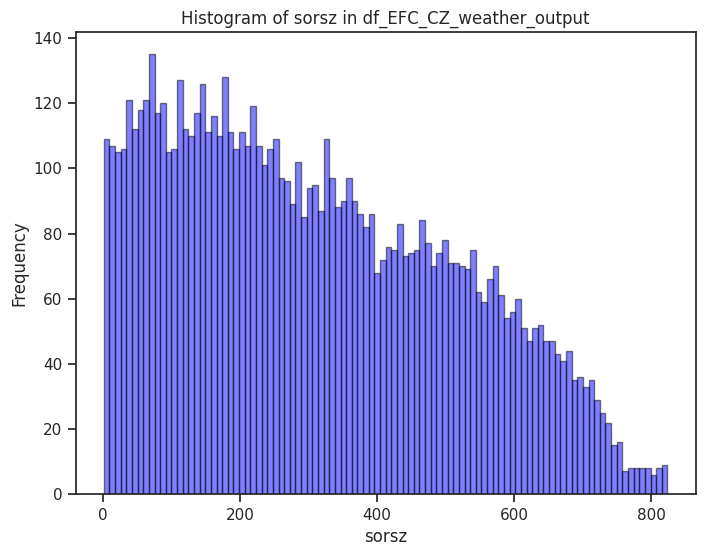

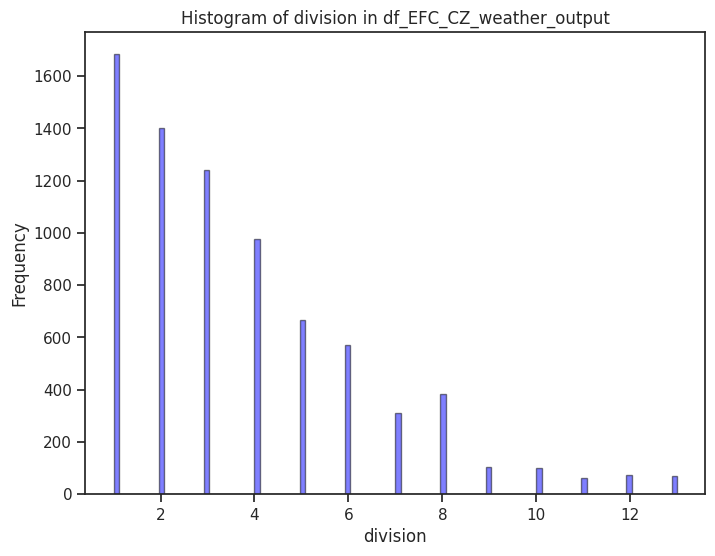

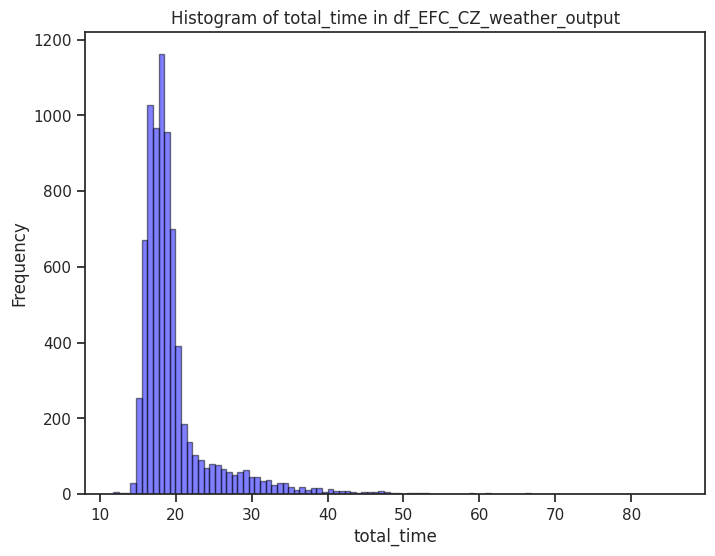

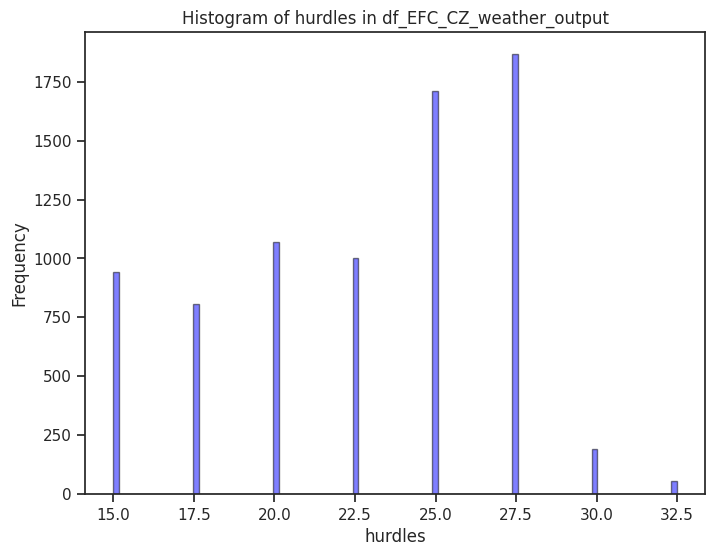

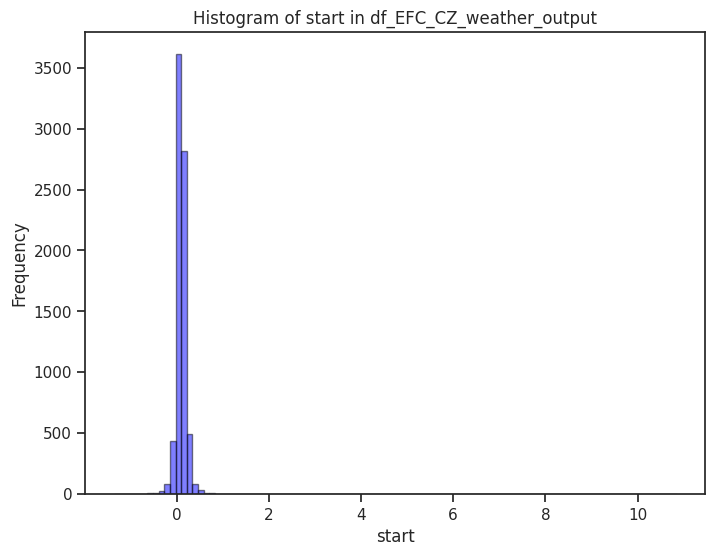

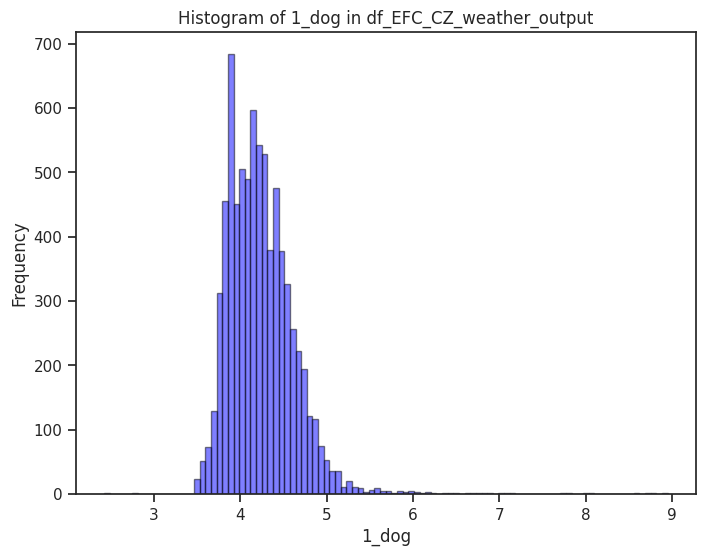

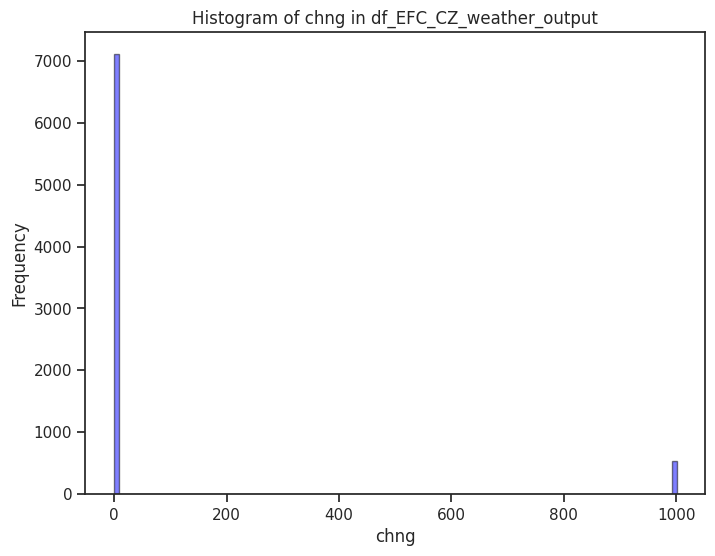

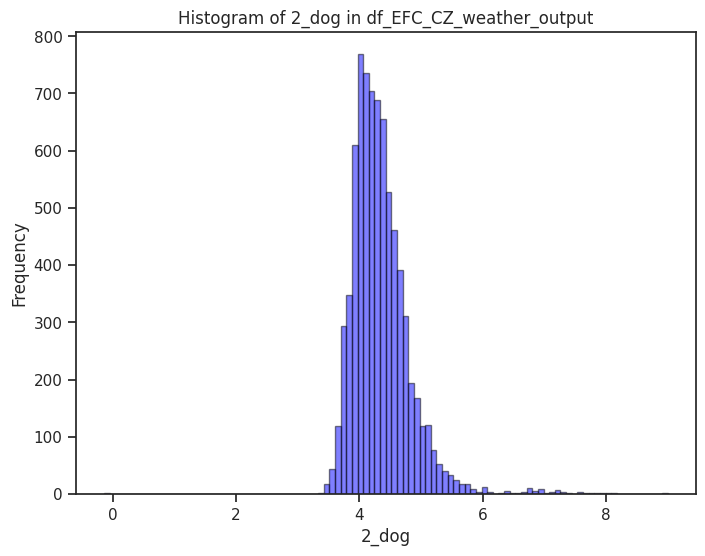

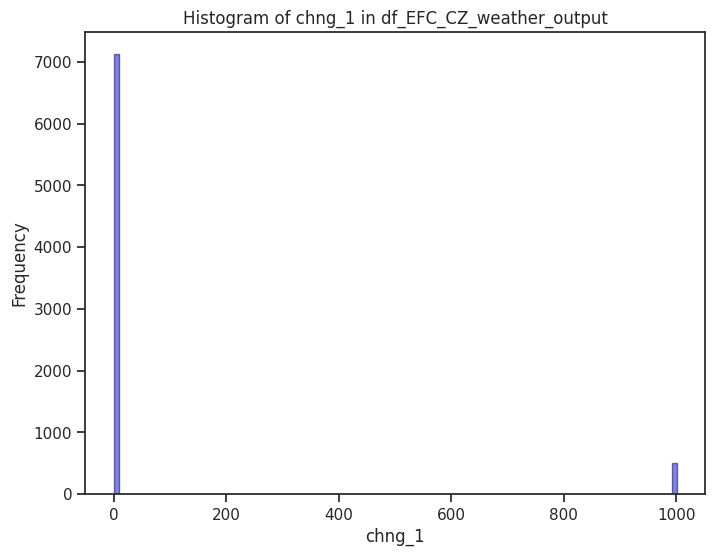

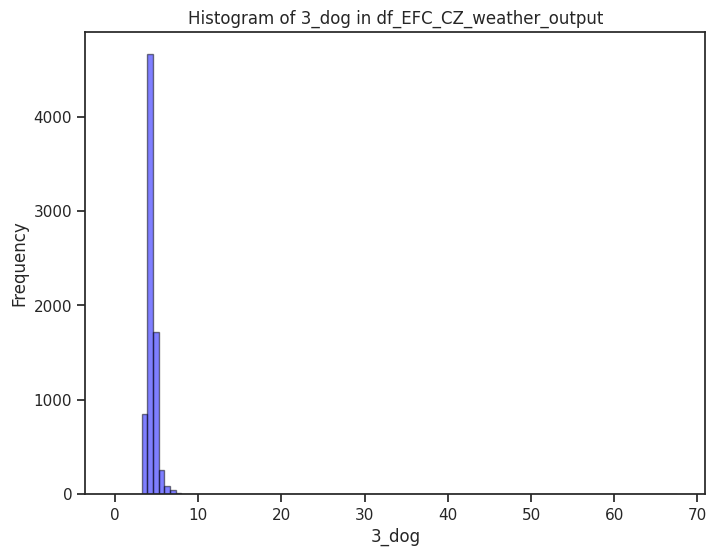

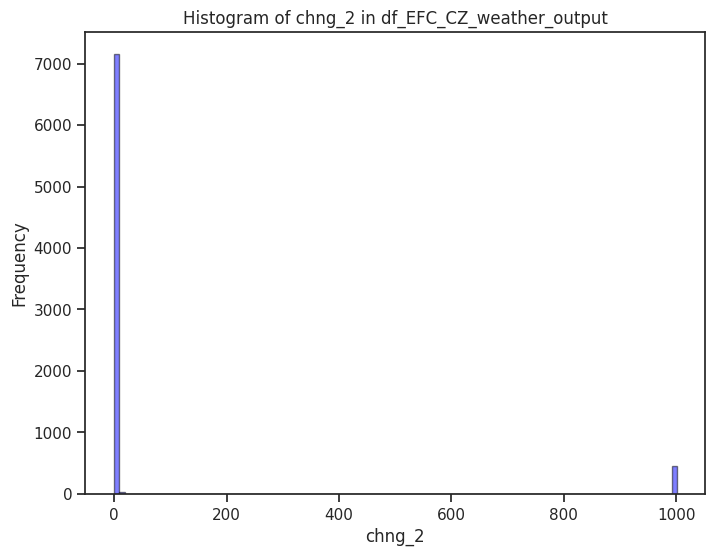

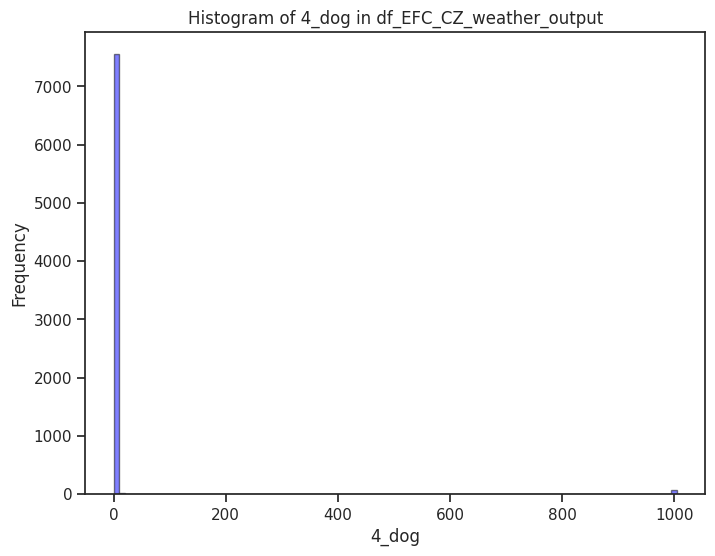

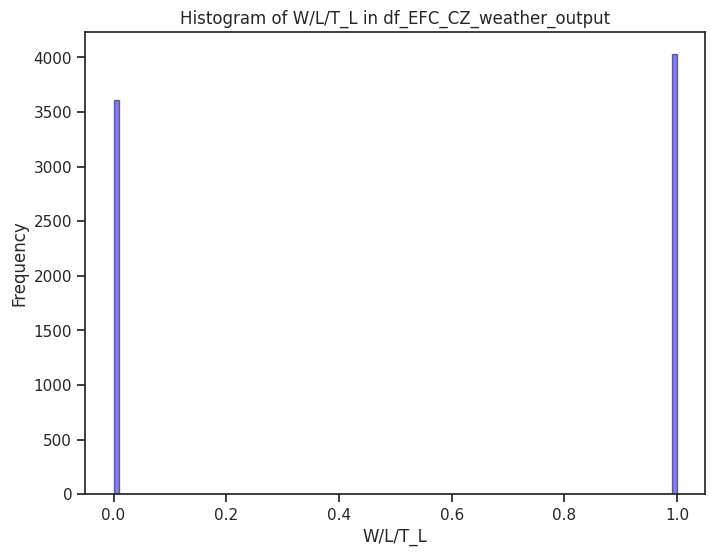

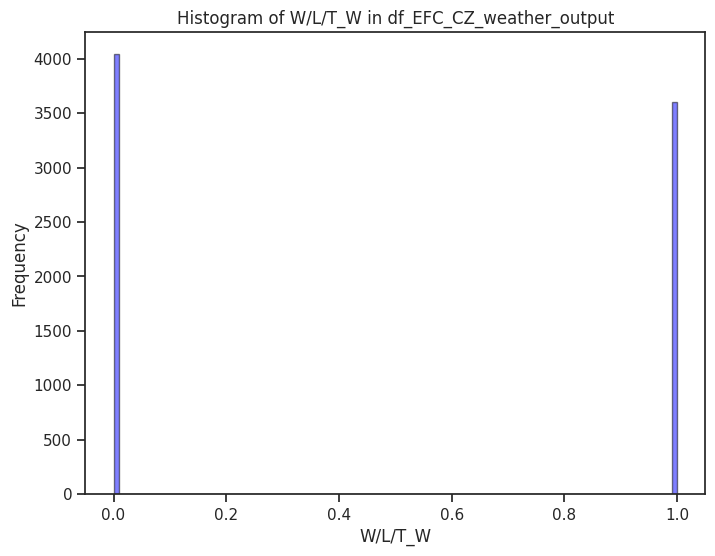

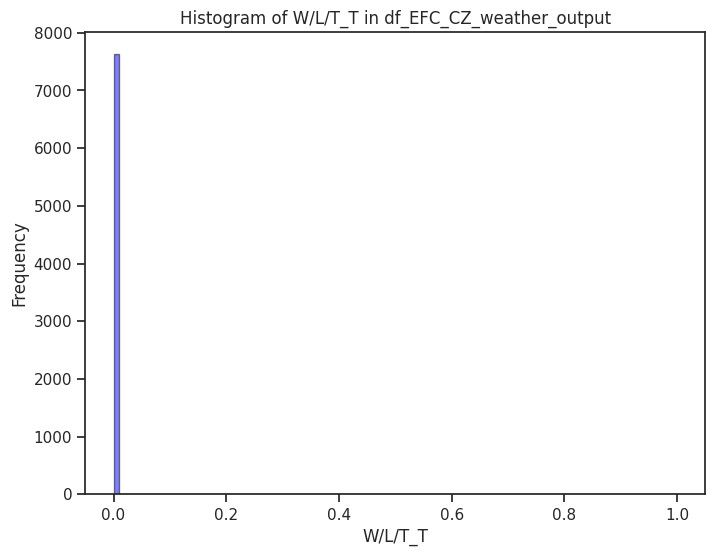

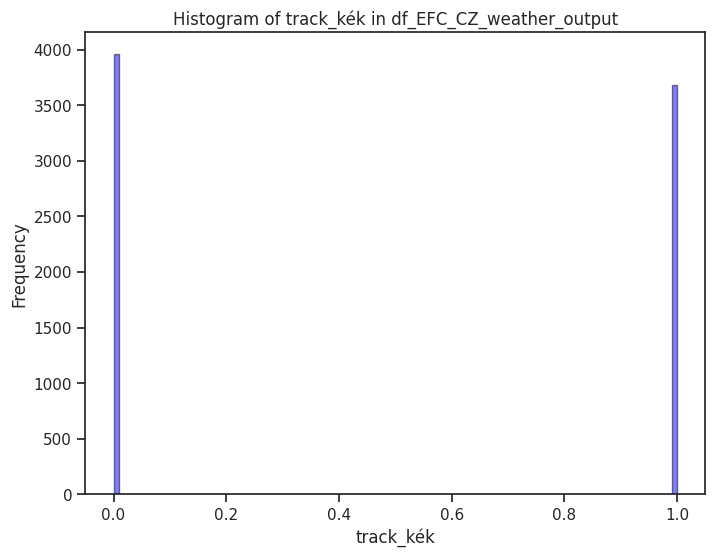

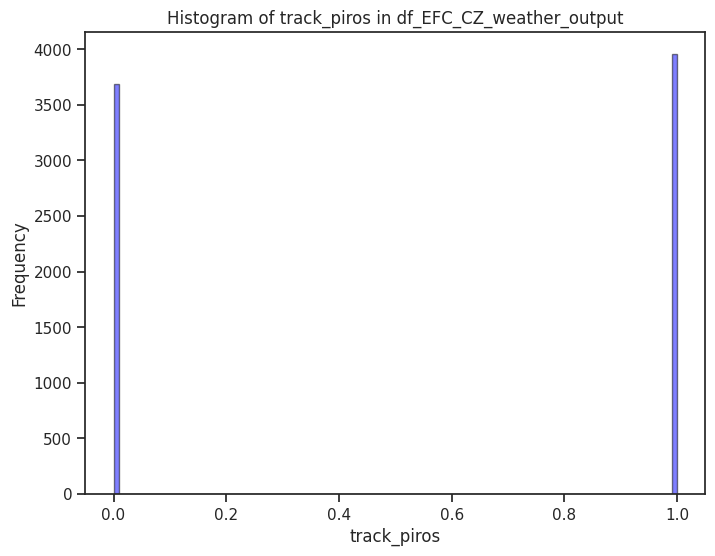

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

In [193]:
plot_histograms("df_EFC_CZ_weather_output")

In [194]:
# kutyák futási teljesítményére szignifikáns hatással van-e az, hogy ivaros/ivartalan kanra/szukára vált rá a kutya
# A df_runs DataFrame előkészítése
# A df_runs DataFrame előkészítése
df_runs = df_EFC_CZ_weather[['name', 'name_1', 'name_2', 'name_3', '1_dog', '2_dog', '3_dog', '4_dog']].copy()

# A df_WRFT DataFrame előkészítése az összekapcsoláshoz
df_WRFT_renamed = df_WRFT.rename(columns={'nev': 'name'})

# Az összekapcsolás a megfelelő következő kutyával
for i in range(1, 4):
    next_column = f'name_{i}'
    df_runs = pd.merge(df_runs, df_WRFT_renamed[['name', 'nem', 'ivar']], left_on=next_column, right_on='name', how='left', suffixes=('', f'_next{i}'))

# Ellenőrzés, hogy a kulcsok létrejöttek-e
print(df_runs.columns)


Index(['name', 'name_1', 'name_2', 'name_3', '1_dog', '2_dog', '3_dog',
       '4_dog', 'name_next1', 'nem', 'ivar', 'name_next2', 'nem_next2',
       'ivar_next2', 'name_next3', 'nem_next3', 'ivar_next3'],
      dtype='object')


In [195]:
# Következő kutyák neveinek és futásidejüknek kinyerése
columns_needed = ['name', 'name_1', 'name_2', 'name_3', '1_dog', '2_dog', '3_dog', '4_dog']
df_runs = df_EFC_CZ_weather[columns_needed].copy()

# df_WRFT DataFrame előkészítése az összekapcsoláshoz
df_WRFT_renamed = df_WRFT.rename(columns={'nev': 'name'})

# Minden futásnál az előző és következő kutya adatainak összekapcsolása
for i in range(1, 5):
    prev_column = f'name_{i-1}' if i > 1 else 'name'
    next_column = f'name_{i}' if i < 4 else None
    df_runs = df_runs.merge(df_WRFT_renamed[['name', 'nem', 'ivar']], left_on=prev_column, right_on='name', how='left', suffixes=('', f'_prev_{i}'))
    if next_column:
        df_runs = df_runs.merge(df_WRFT_renamed[['name', 'nem', 'ivar']], left_on=next_column, right_on='name', how='left', suffixes=('', f'_next_{i}'))


In [196]:
import scipy.stats as stats

# Példa a tesztre: Az első és második kutya közötti váltás vizsgálata
group_data = df_runs.groupby(['nem_next_1', 'ivar_next_1'])['1_dog'].apply(list).reset_index()

# ANOVA teszt, ha a '1_dog' adatok normális eloszlásúak
if all(len(x) > 2 for x in group_data['1_dog']):
    if stats.normaltest(np.concatenate(group_data['1_dog'].values)).pvalue > 0.05:
        f_val, p_val = stats.f_oneway(*group_data['1_dog'].values)
        test_name = 'ANOVA'
    else:
        f_val, p_val = stats.kruskal(*group_data['1_dog'].values)
        test_name = 'Kruskal-Wallis'
    print(f'Test: {test_name}, F value: {f_val}, P value: {p_val}')
else:
    print('Nem megfelelő csoport méret a teszthez.')


Test: Kruskal-Wallis, F value: 236.03577428468844, P value: 6.850783209901408e-51


A Kruskal-Wallis teszt eredményei, amelyet a kutyák futási teljesítményére gyakorolt hatás elemzésére használtunk a következő kutya nemének és ivari állapotának függvényében, jelentős statisztikai különbséget mutatnak. Az
𝐹
F érték, amely valójában a Kruskal-Wallis statisztika, nagyon magas, 300.335, ami jelzi, hogy a csoportok között jelentős különbségek vannak. A
𝑝
p-érték, 8.416e-65, rendkívül kicsi, lényegében nulla közelében van, ami azt sugallja, hogy a különbségek a csoportok között statisztikailag szignifikánsak.

Ez az eredmény azt jelenti, hogy elutasíthatjuk a nullhipotézist, amely szerint nincs különbség a különböző csoportok (különböző nemek és ivari állapotok szerinti csoportok) futási teljesítménye között. Azt mondhatjuk, hogy nagyon valószínű, hogy a következő kutya nemének és ivari állapotának valóban van hatása a futás teljesítményére.

Ez azt sugallja, hogy az ivar és a nem, mint változók, fontos szerepet játszanak a kutyák futási teljesítményében, és ezt figyelembe kell venni, amikor futási eredményeket értékelünk vagy futamstratégiákat tervezünk. Az eredmények további elemzése és értelmezése szükséges lehet a hatás pontos mértékének, irányának és gyakorlati jelentőségének megértéséhez.







##Innen már csak ellenőrzés

##Folytasd ezzel: XXXXXX.ipynb

###Sajnos a rendelkezésemre álló idő hiányában nincs folytatás, pedig az elképzeléseim még nem fogytak el. Sőt most lódultak meg igazán. De ezt már csak versenyen kívül folytatom majd.
